In [1]:
cd ./drive/MyDrive/프리온보딩

/content/drive/MyDrive/프리온보딩


In [2]:
# plot 한글 깨짐 현상 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

plt.rc('font', family='NanumBarunGothic') 


In [4]:
!ls

 1_문자열_매칭.ipynb		   pretest_data.csv
 2-2_데이터_분석_및_시각화.ipynb   requirement.ipynb
 2_데이터_분석_및_시각화.ipynb	   Week2_1_torch_tutorial_1.ipynb
 figure				  '김성우 - Week2_2_assignment.ipynb'


In [5]:
data = pd.read_csv('./pretest_data.csv')
data

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
0,V-0db,CH49ta0,2021-07-01,Entertainment,PT8M20S,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...,BTS performs their hit songs ‘Dynamite’ and ‘B...,2021-07-03,2021-07-04,13,...,792,1014,10373,10720,1080000,1080000,685992413,687485021,5947,5950
1,V-1XL,CHZVD--,2021-06-24,Entertainment,PT9M17S,치킨불냉면|치킨|불냉면|냉면,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...,2021-06-26,2021-06-27,28,...,121,154,1083,1173,627000,628000,75327083,75685030,70,70
2,V-4fa,CH9w-h_,2021-07-17,Entertainment,PT7M39S,NaN,"거세 구형, 성 충동 제거를 위한 엄벌 치료 VS 인권 보호해야고민 끝에 내린 강요...",2021-07-19,2021-07-22,1,...,162,233,696,1006,5750000,5750000,5424167911,5431617741,34270,34341
3,V-5ip,CHUQVGX,2021-06-02,Sports,PT6M40S,News Network|SBS SPORTSMUG|SPORTSMUG|스포츠머그|축구|...,세계 최초 9회 연속 올림픽 본선 진출! 그동안 한국 축구의 역사를 써내려 간 올림...,2021-06-04,2021-06-04,18,...,30,30,416,416,94200,94200,71160125,71160125,224,224
4,V-5jn,CHhI3EX,2021-07-06,Sports,PT11M27S,이천수|심판도전기|축구심판,찾아 뵐 심판분들이 이제 18명정도 남았네요,2021-07-08,2021-07-09,11,...,112,143,687,772,47600,49200,6993451,7607123,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,VzwuB,CH69uMh,2021-05-09,Comedy,PT2M34S,아프리카tv|봉준|와꾸대장봉준|BJ|컨텐츠|클립,BJ봉준입니다 저는 2021년 5월 10일 새벽 1시경 동료BJ들과 방송을 진행하던...,2021-05-11,2021-05-14,2,...,22830,42024,19228,28591,1010000,1000000,790006060,792406169,7659,7658
2640,VzxuL,CHhbE5O,2021-07-29,Comedy,PT6M39S,장삐쭈|삐쭈|ㅋㅋㅋ|삐쮸|장삐쮸|병맛더빙|더빙|웃긴동영상|꿀잼|신병|장삐쭈 단편선|...,"스튜디오 장삐쭈장삐쭈, 정영준, 안류천, 포포, 윤성원, 허혜원, 정대준, 지정민,...",2021-07-31,2021-07-31,1,...,558,558,18125,18125,2920000,2920000,1280502681,1280502681,363,363
2641,VzygR,CHO4RG1,2021-04-20,Science & Technology,PT11M45S,아이패드 프로|아이패드 프로5|아이패드 프로 5세대|신형 아이맥|아이맥|iMac|에...,"애플 봄 스페셜 이벤트를 통해서 공개된 아이패드 프로 5세대, 신형 아이맥, 에어태...",2021-04-22,2021-04-22,32,...,46,46,438,438,73100,73100,28123608,28123608,1139,1139
2642,Vzz6W,CHYeeEw,2021-04-26,Entertainment,PT11M27S,고요 속의 외침|뽕숭아학당|슬기로운캠핑생활|아는형님|미스터트롯|임영웅|영탁|장민호|...,비빈 닭↘고↗기 부터이진관 덕후까지레전드 꿀잼!!#뽕숭아학당 #미스터트롯 #고요속의...,2021-04-28,2021-04-29,20,...,67,82,230,281,298000,299000,139692013,140182861,461,464


In [6]:
grouped = data.channel_id.groupby(data.category_name)
grouped.size()

category_name
Autos & Vehicles          31
Comedy                   167
Education                 65
Entertainment            954
Film & Animation          74
Gaming                    80
Howto & Style            119
Music                    234
News & Politics          162
Nonprofits & Activism      1
People & Blogs           411
Pets & Animals            65
Science & Technology      36
Sports                   222
Travel & Events           23
Name: channel_id, dtype: int64

## 카테고리 별 비디오 개수 count
* 전체 기간 동안, 어떤 카테고리가 Hot했을까?

In [7]:
list(data.category_name.value_counts())

[954, 411, 234, 222, 167, 162, 119, 80, 74, 65, 65, 36, 31, 23, 1]

In [8]:
percent = [round((i/len(data))*100, 2) for i in list(data.category_name.value_counts())]

In [9]:
percent

[36.08,
 15.54,
 8.85,
 8.4,
 6.32,
 6.13,
 4.5,
 3.03,
 2.8,
 2.46,
 2.46,
 1.36,
 1.17,
 0.87,
 0.04]

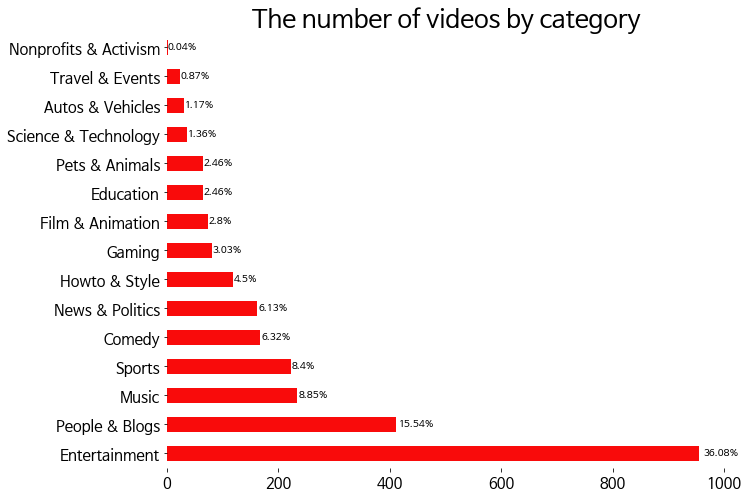

In [10]:
CountStatus = data.value_counts(data.category_name.values, sort=True)
ax = CountStatus.plot.barh(figsize=(10,8), fontsize=15, color='#F90B0B')
plt.title('The number of videos by category', fontsize=25)
for p,i in zip(ax.patches, percent):
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, f'{i}%', va='center')
plt.sca(ax)
plt.box(False)
plt.show()

## 카테고리 내, 각 채널의 비디오 개수
* 각 카테고리에서 어떤 channel이 얼만큼의 비디오를 업로드했을까?


In [11]:
data.category_name.unique()

array(['Entertainment', 'Sports', 'Music', 'People & Blogs',
       'Science & Technology', 'Education', 'Howto & Style',
       'News & Politics', 'Gaming', 'Comedy', 'Pets & Animals',
       'Travel & Events', 'Film & Animation', 'Autos & Vehicles',
       'Nonprofits & Activism'], dtype=object)

In [12]:
Entertainment = data[data.category_name=='Entertainment']
Sports = data[data.category_name=='Sports']
Music = data[data.category_name=='Music']
People_Blogs = data[data.category_name=='People & Blogs']
Science_Technology = data[data.category_name=='Science & Technology']
Education = data[data.category_name=='Education']
Howto_Style = data[data.category_name=='Howto & Style']
News_Politics = data[data.category_name=='News & Politics']
Gaming = data[data.category_name=='Gaming']
Comedy = data[data.category_name=='Comedy']
Pets_Animals = data[data.category_name=='Pets & Animals']
Travel_Events = data[data.category_name=='Travel & Events']
Film_Animation = data[data.category_name=='Film & Animation']
Autos_Vehicles = data[data.category_name=='Autos & Vehicles']
Nonprofits_Activism = data[data.category_name=='Nonprofits & Activism']

In [13]:
list_ = [Entertainment, Sports, Music, People_Blogs, Science_Technology, Education, Howto_Style, News_Politics,
         Gaming, Comedy, Pets_Animals, Travel_Events, Film_Animation, Autos_Vehicles, Nonprofits_Activism]

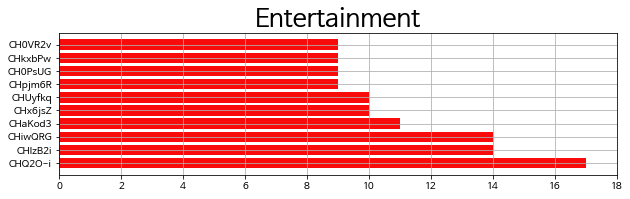

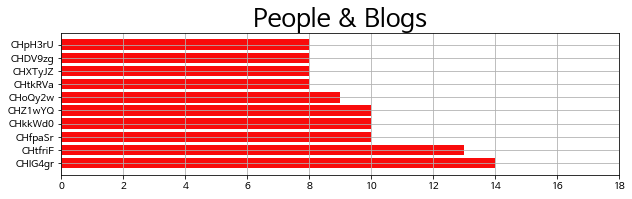

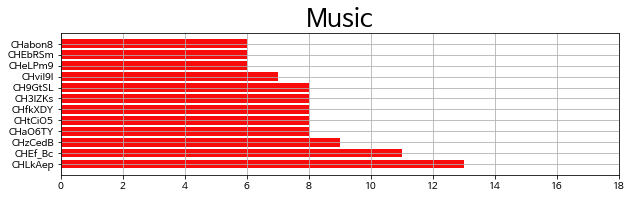

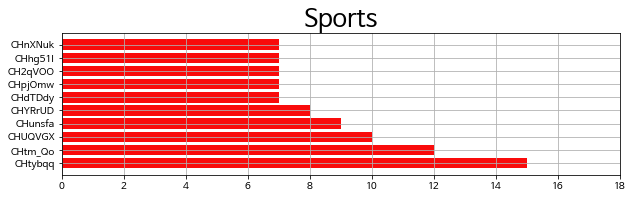

<Figure size 432x288 with 0 Axes>

In [14]:
Ent = pd.DataFrame(Entertainment.channel_id.value_counts())
Ent = Ent[Ent.channel_id>8]
Peo = pd.DataFrame(People_Blogs.channel_id.value_counts())
Peo = Peo[Peo.channel_id>7]
Mus = pd.DataFrame(Music.channel_id.value_counts())
Mus = Mus[Mus.channel_id>5]
Spo = pd.DataFrame(Sports.channel_id.value_counts())
Spo = Spo[Spo.channel_id>6]

val = [i for i in range(0,20,2)]

cat = [Ent, Peo, Mus, Spo]
cat = {'Entertainment': Ent, 'People & Blogs': Peo, 'Music': Mus, 'Sports': Spo}
for idx, i in enumerate(cat.keys()):
    fig = plt.figure(figsize = (10,12))
    ax = fig.add_subplot(4,1,idx+1)
    plt.barh(cat[i].index, cat[i].channel_id, color='#F90B0B')
    plt.title(f'{i}', fontsize=25)
    plt.xticks(val)
    plt.grid(True)
plt.show()
plt.savefig('./figure/test.png')

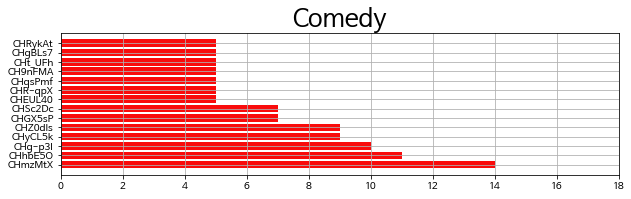

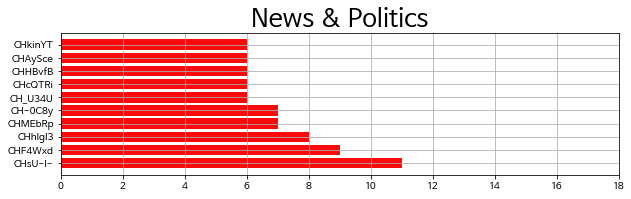

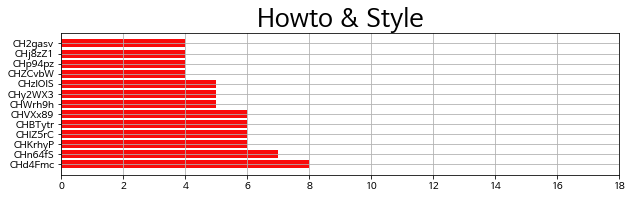

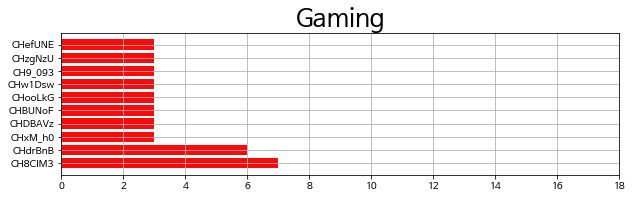

In [15]:
Com = pd.DataFrame(Comedy.channel_id.value_counts())
Com = Com[Com.channel_id>4]
New = pd.DataFrame(News_Politics.channel_id.value_counts())
New = New[New.channel_id>5]
How = pd.DataFrame(Howto_Style.channel_id.value_counts())
How = How[How.channel_id>3]
Gam = pd.DataFrame(Gaming.channel_id.value_counts())
Gam = Gam[Gam.channel_id>2]

val = [i for i in range(0,20,2)]

cat = {'Comedy': Com, 'News & Politics': New, 'Howto & Style': How, 'Gaming': Gam}
for idx, i in enumerate(cat.keys()):
    fig = plt.figure(figsize = (10,12))
    ax = fig.add_subplot(4,1,idx+1)
    plt.barh(cat[i].index, cat[i].channel_id, color='#F90B0B')
    plt.title(f'{i}', fontsize=25)
    plt.xticks(val)
    plt.grid(True)
    plt.show()

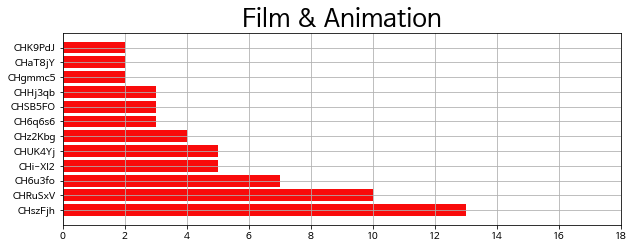

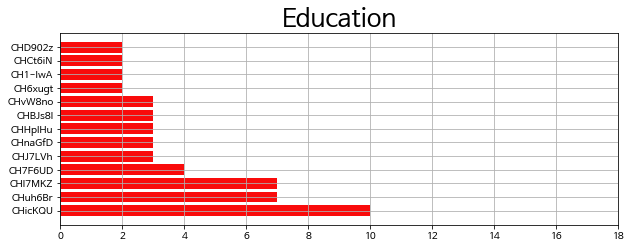

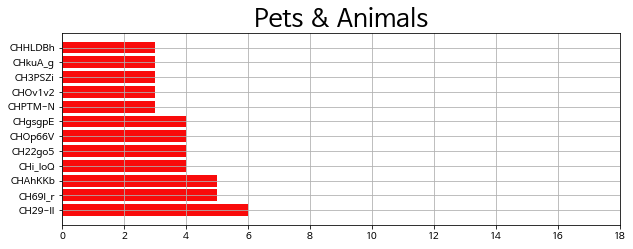

In [16]:
Fil = pd.DataFrame(Film_Animation.channel_id.value_counts())
Fil = Fil[Fil.channel_id>1]
Edu = pd.DataFrame(Education.channel_id.value_counts())
Edu = Edu[Edu.channel_id>1]
Pet = pd.DataFrame(Pets_Animals.channel_id.value_counts())
Pet = Pet[Pet.channel_id>2]

val = [i for i in range(0,20,2)]

cat = {'Film & Animation': Fil, 'Education': Edu, 'Pets & Animals': Pet}
for idx, i in enumerate(cat.keys()):
    fig = plt.figure(figsize = (10,12))
    ax = fig.add_subplot(3,1,idx+1)
    plt.barh(cat[i].index, cat[i].channel_id, color='#F90B0B')
    plt.title(f'{i}', fontsize=25)
    plt.xticks(val)
    plt.grid(True)
    plt.show()

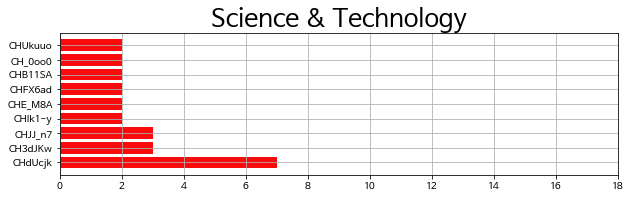

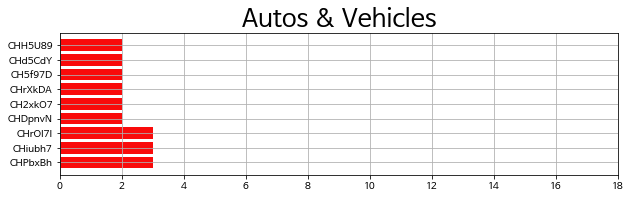

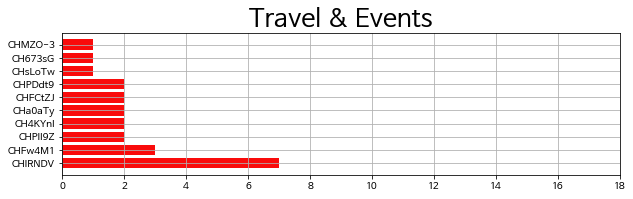

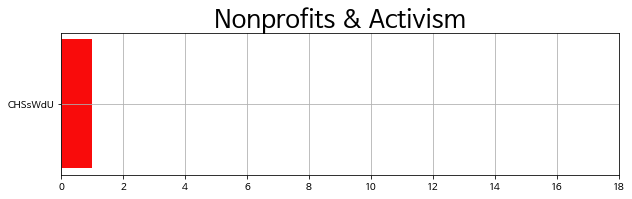

In [17]:
Sci = pd.DataFrame(Science_Technology.channel_id.value_counts())
Sci = Sci[Sci.channel_id>1]
Aut = pd.DataFrame(Autos_Vehicles.channel_id.value_counts())
Aut = Aut[Aut.channel_id>1]
Tra = pd.DataFrame(Travel_Events.channel_id.value_counts())
Tra = Tra[Tra.channel_id>0]
Non = pd.DataFrame(Nonprofits_Activism.channel_id.value_counts())
Non = Non[Non.channel_id>0]

val = [i for i in range(0,20,2)]

cat = {'Science & Technology': Sci, 'Autos & Vehicles': Aut, 'Travel & Events': Tra, 'Nonprofits & Activism': Non}
for idx, i in enumerate(cat.keys()):
    fig = plt.figure(figsize = (10,12))
    ax = fig.add_subplot(4,1,idx+1)
    plt.barh(cat[i].index, cat[i].channel_id, color='#F90B0B')
    plt.title(f'{i}', fontsize=25)
    plt.xticks(val)
    plt.grid(True)
    plt.show()

## 월 별로 Dataframe 생성

In [18]:
march = data[data.published_date.str.contains('2021-03-')]
np.sort(march.published_date.unique()), len(march)

(array(['2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28',
        '2021-03-29', '2021-03-30', '2021-03-31'], dtype=object), 74)

In [19]:
april = data[data.published_date.str.contains('2021-04-')]
np.sort(april.published_date.unique()), len(april)

(array(['2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
        '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
        '2021-04-09', '2021-04-10', '2021-04-11', '2021-04-12',
        '2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16',
        '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20',
        '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24',
        '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28',
        '2021-04-29', '2021-04-30'], dtype=object), 675)

In [20]:
may = data[data.published_date.str.contains('2021-05-')]
np.sort(may.published_date.unique()), len(may)

(array(['2021-05-01', '2021-05-02', '2021-05-03', '2021-05-04',
        '2021-05-05', '2021-05-06', '2021-05-07', '2021-05-08',
        '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
        '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16',
        '2021-05-17', '2021-05-18', '2021-05-19', '2021-05-20',
        '2021-05-21', '2021-05-22', '2021-05-23', '2021-05-24',
        '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28',
        '2021-05-29', '2021-05-30', '2021-05-31'], dtype=object), 656)

In [21]:
june = data[data.published_date.str.contains('2021-06-')]
np.sort(june.published_date.unique()), len(june)

(array(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
        '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
        '2021-06-09', '2021-06-10', '2021-06-11', '2021-06-12',
        '2021-06-13', '2021-06-14', '2021-06-15', '2021-06-16',
        '2021-06-17', '2021-06-18', '2021-06-19', '2021-06-20',
        '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
        '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28',
        '2021-06-29', '2021-06-30'], dtype=object), 655)

In [22]:
july = data[data.published_date.str.contains('2021-07-')]
np.sort(july.published_date.unique()), len(july)

(array(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
        '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
        '2021-07-09', '2021-07-10', '2021-07-11', '2021-07-12',
        '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
        '2021-07-17', '2021-07-18', '2021-07-19', '2021-07-20',
        '2021-07-21', '2021-07-22', '2021-07-23', '2021-07-24',
        '2021-07-25', '2021-07-26', '2021-07-27', '2021-07-28',
        '2021-07-29'], dtype=object), 584)

In [23]:
# 3월은 74개의 sample 밖에 없으므로 4월과 합쳐서 분석
march.shape, april.shape

((74, 25), (675, 25))

In [24]:
april = pd.concat([march, april])

In [25]:
april.shape

(749, 25)

### 3&4월

In [26]:
data = april
color = '#B266FF'

In [27]:
list(data.category_name.value_counts())

[284, 110, 67, 59, 55, 46, 33, 21, 19, 14, 12, 11, 10, 8]

In [28]:
percent = [round((i/len(data))*100, 2) for i in list(data.category_name.value_counts())]

In [29]:
percent

[37.92,
 14.69,
 8.95,
 7.88,
 7.34,
 6.14,
 4.41,
 2.8,
 2.54,
 1.87,
 1.6,
 1.47,
 1.34,
 1.07]

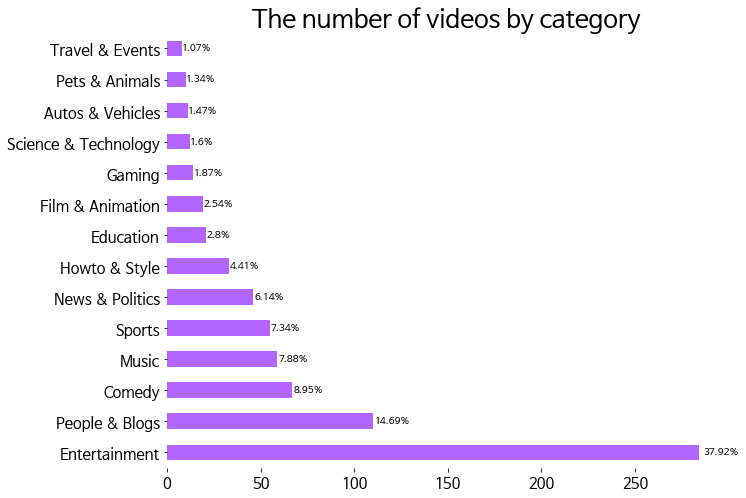

In [30]:
CountStatus = data.value_counts(data.category_name.values, sort=True)
ax = CountStatus.plot.barh(figsize=(10,8), fontsize=15, color=color)
plt.title('The number of videos by category', fontsize=25)
for p,i in zip(ax.patches, percent):
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, f'{i}%', va='center')
plt.sca(ax)
plt.box(False)
plt.show()

In [31]:
Entertainment = data[data.category_name=='Entertainment']
Sports = data[data.category_name=='Sports']
Music = data[data.category_name=='Music']
People_Blogs = data[data.category_name=='People & Blogs']
Science_Technology = data[data.category_name=='Science & Technology']
Education = data[data.category_name=='Education']
Howto_Style = data[data.category_name=='Howto & Style']
News_Politics = data[data.category_name=='News & Politics']
Gaming = data[data.category_name=='Gaming']
Comedy = data[data.category_name=='Comedy']
Pets_Animals = data[data.category_name=='Pets & Animals']
Travel_Events = data[data.category_name=='Travel & Events']
Film_Animation = data[data.category_name=='Film & Animation']
Autos_Vehicles = data[data.category_name=='Autos & Vehicles']
Nonprofits_Activism = data[data.category_name=='Nonprofits & Activism']

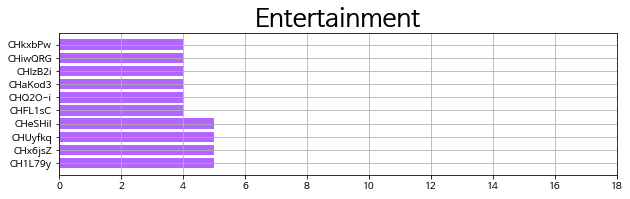

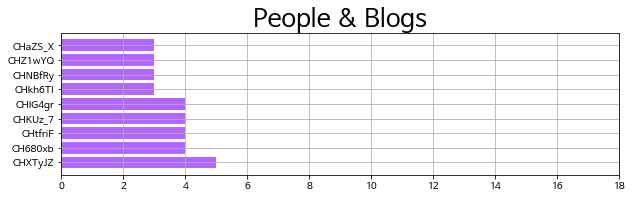

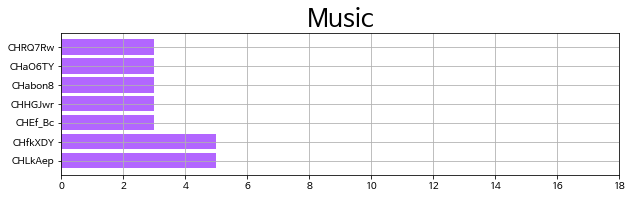

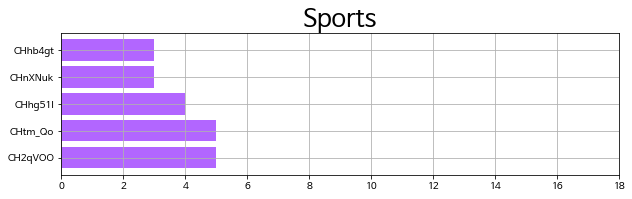

<Figure size 432x288 with 0 Axes>

In [32]:
Ent = pd.DataFrame(Entertainment.channel_id.value_counts())
Ent = Ent[Ent.channel_id>3]
Peo = pd.DataFrame(People_Blogs.channel_id.value_counts())
Peo = Peo[Peo.channel_id>2]
Mus = pd.DataFrame(Music.channel_id.value_counts())
Mus = Mus[Mus.channel_id>2]
Spo = pd.DataFrame(Sports.channel_id.value_counts())
Spo = Spo[Spo.channel_id>2]

val = [i for i in range(0,20,2)]

cat = [Ent, Peo, Mus, Spo]
cat = {'Entertainment': Ent, 'People & Blogs': Peo, 'Music': Mus, 'Sports': Spo}
for idx, i in enumerate(cat.keys()):
    fig = plt.figure(figsize = (10,12))
    ax = fig.add_subplot(4,1,idx+1)
    plt.barh(cat[i].index, cat[i].channel_id, color=color)
    plt.title(f'{i}', fontsize=25)
    plt.xticks(val)
    plt.grid(True)
plt.show()
plt.savefig('./figure/test.png')

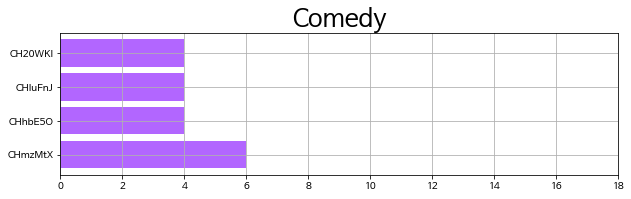

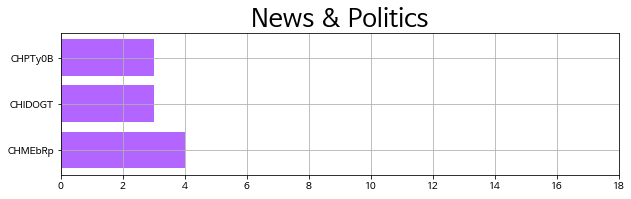

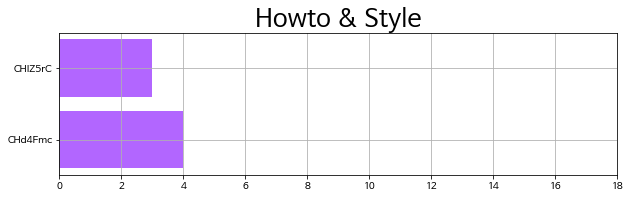

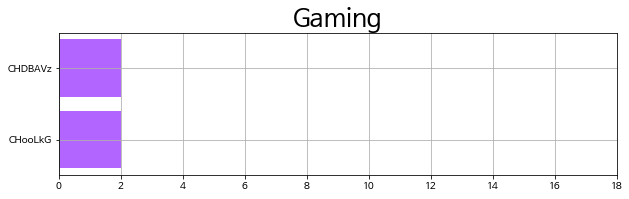

In [33]:
Com = pd.DataFrame(Comedy.channel_id.value_counts())
Com = Com[Com.channel_id>3]
New = pd.DataFrame(News_Politics.channel_id.value_counts())
New = New[New.channel_id>2]
How = pd.DataFrame(Howto_Style.channel_id.value_counts())
How = How[How.channel_id>2]
Gam = pd.DataFrame(Gaming.channel_id.value_counts())
Gam = Gam[Gam.channel_id>1]

val = [i for i in range(0,20,2)]

cat = {'Comedy': Com, 'News & Politics': New, 'Howto & Style': How, 'Gaming': Gam}
for idx, i in enumerate(cat.keys()):
    fig = plt.figure(figsize = (10,12))
    ax = fig.add_subplot(4,1,idx+1)
    plt.barh(cat[i].index, cat[i].channel_id, color=color)
    plt.title(f'{i}', fontsize=25)
    plt.xticks(val)
    plt.grid(True)
    plt.show()

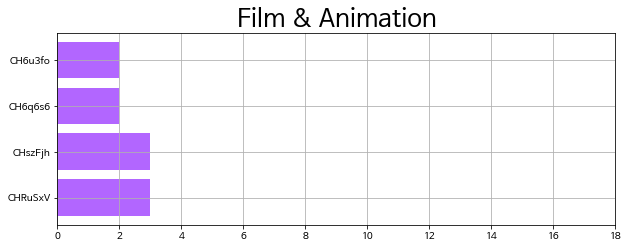

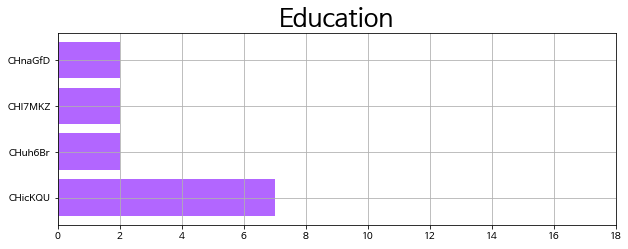

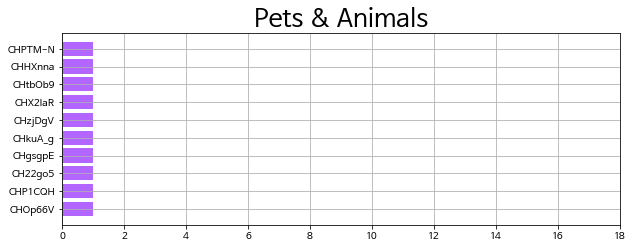

In [34]:
Fil = pd.DataFrame(Film_Animation.channel_id.value_counts())
Fil = Fil[Fil.channel_id>1]
Edu = pd.DataFrame(Education.channel_id.value_counts())
Edu = Edu[Edu.channel_id>1]
Pet = pd.DataFrame(Pets_Animals.channel_id.value_counts())
Pet = Pet[Pet.channel_id>0]

val = [i for i in range(0,20,2)]

cat = {'Film & Animation': Fil, 'Education': Edu, 'Pets & Animals': Pet}
for idx, i in enumerate(cat.keys()):
    fig = plt.figure(figsize = (10,12))
    ax = fig.add_subplot(3,1,idx+1)
    plt.barh(cat[i].index, cat[i].channel_id, color='#B266FF')
    plt.title(f'{i}', fontsize=25)
    plt.xticks(val)
    plt.grid(True)
    plt.show()

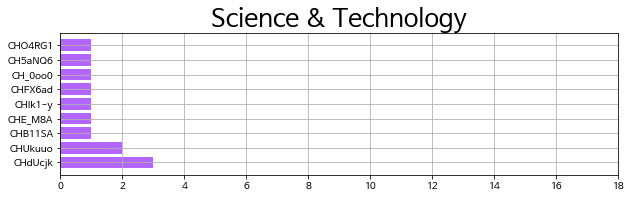

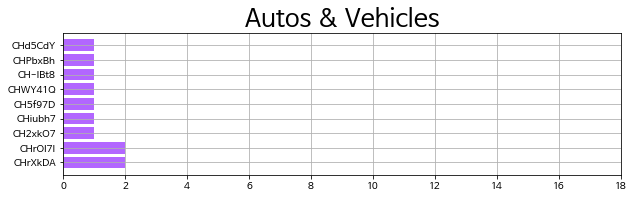

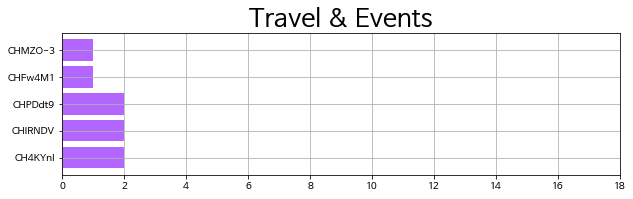

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


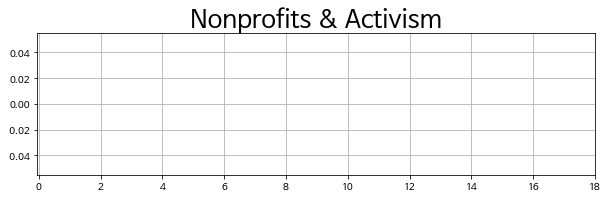

In [35]:
Sci = pd.DataFrame(Science_Technology.channel_id.value_counts())
Sci = Sci[Sci.channel_id>0]
Aut = pd.DataFrame(Autos_Vehicles.channel_id.value_counts())
Aut = Aut[Aut.channel_id>0]
Tra = pd.DataFrame(Travel_Events.channel_id.value_counts())
Tra = Tra[Tra.channel_id>0]
Non = pd.DataFrame(Nonprofits_Activism.channel_id.value_counts())
Non = Non[Non.channel_id>0]

val = [i for i in range(0,20,2)]

cat = {'Science & Technology': Sci, 'Autos & Vehicles': Aut, 'Travel & Events': Tra, 'Nonprofits & Activism': Non}
for idx, i in enumerate(cat.keys()):
    fig = plt.figure(figsize = (10,12))
    ax = fig.add_subplot(4,1,idx+1)
    plt.barh(cat[i].index, cat[i].channel_id, color='#B266FF')
    plt.title(f'{i}', fontsize=25)
    plt.xticks(val)
    plt.grid(True)
    plt.show()

### 5월

In [36]:
data = may
color='#66FFFF'

In [37]:
list(data.category_name.value_counts())

[246, 96, 67, 57, 38, 33, 31, 22, 18, 16, 11, 8, 7, 5, 1]

In [38]:
percent = [round((i/len(data))*100, 2) for i in list(data.category_name.value_counts())]

In [39]:
percent

[37.5,
 14.63,
 10.21,
 8.69,
 5.79,
 5.03,
 4.73,
 3.35,
 2.74,
 2.44,
 1.68,
 1.22,
 1.07,
 0.76,
 0.15]

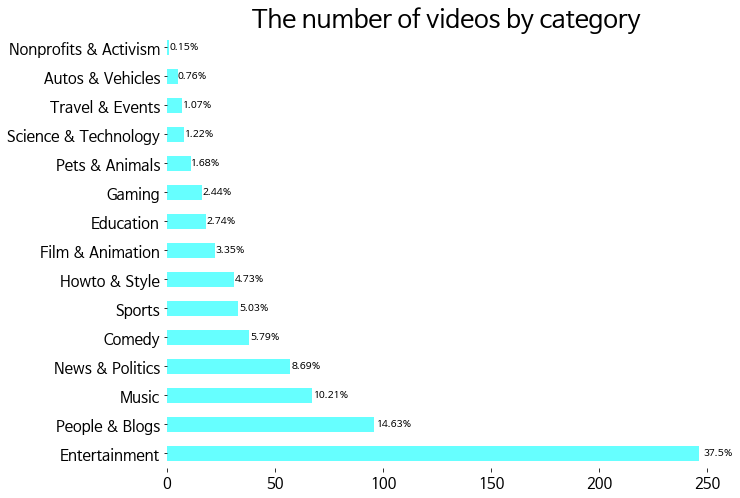

In [40]:
CountStatus = data.value_counts(data.category_name.values, sort=True)
ax = CountStatus.plot.barh(figsize=(10,8), fontsize=15, color=color)
plt.title('The number of videos by category', fontsize=25)
for p,i in zip(ax.patches, percent):
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, f'{i}%', va='center')
plt.sca(ax)
plt.box(False)
plt.show()

In [41]:
Entertainment = data[data.category_name=='Entertainment']
Sports = data[data.category_name=='Sports']
Music = data[data.category_name=='Music']
People_Blogs = data[data.category_name=='People & Blogs']
Science_Technology = data[data.category_name=='Science & Technology']
Education = data[data.category_name=='Education']
Howto_Style = data[data.category_name=='Howto & Style']
News_Politics = data[data.category_name=='News & Politics']
Gaming = data[data.category_name=='Gaming']
Comedy = data[data.category_name=='Comedy']
Pets_Animals = data[data.category_name=='Pets & Animals']
Travel_Events = data[data.category_name=='Travel & Events']
Film_Animation = data[data.category_name=='Film & Animation']
Autos_Vehicles = data[data.category_name=='Autos & Vehicles']
Nonprofits_Activism = data[data.category_name=='Nonprofits & Activism']

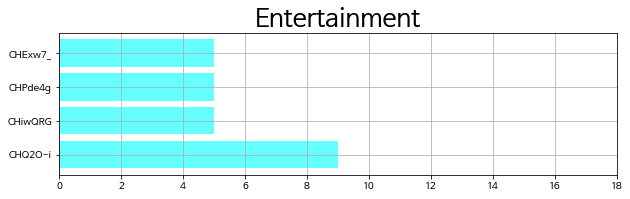

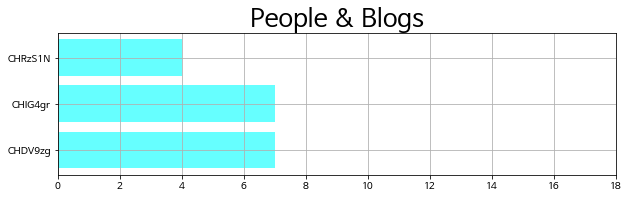

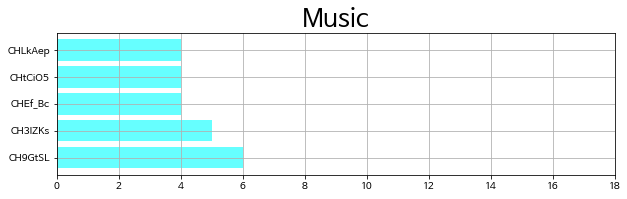

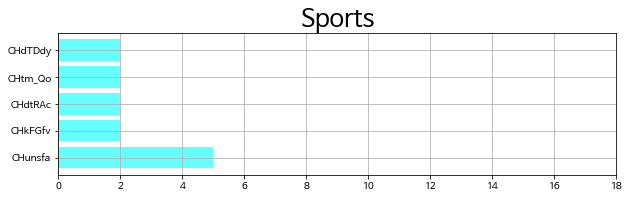

<Figure size 432x288 with 0 Axes>

In [42]:
Ent = pd.DataFrame(Entertainment.channel_id.value_counts())
Ent = Ent[Ent.channel_id>4]
Peo = pd.DataFrame(People_Blogs.channel_id.value_counts())
Peo = Peo[Peo.channel_id>3]
Mus = pd.DataFrame(Music.channel_id.value_counts())
Mus = Mus[Mus.channel_id>2]
Spo = pd.DataFrame(Sports.channel_id.value_counts())
Spo = Spo[Spo.channel_id>1]

val = [i for i in range(0,20,2)]

cat = [Ent, Peo, Mus, Spo]
cat = {'Entertainment': Ent, 'People & Blogs': Peo, 'Music': Mus, 'Sports': Spo}
for idx, i in enumerate(cat.keys()):
    fig = plt.figure(figsize = (10,12))
    ax = fig.add_subplot(4,1,idx+1)
    plt.barh(cat[i].index, cat[i].channel_id, color=color)
    plt.title(f'{i}', fontsize=25)
    plt.xticks(val)
    plt.grid(True)
plt.show()
plt.savefig('./figure/test.png')

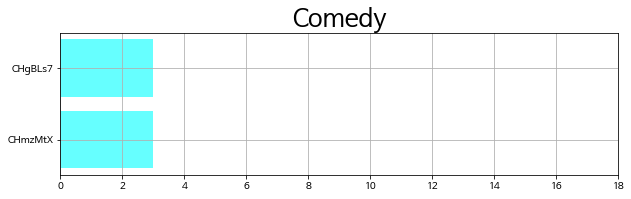

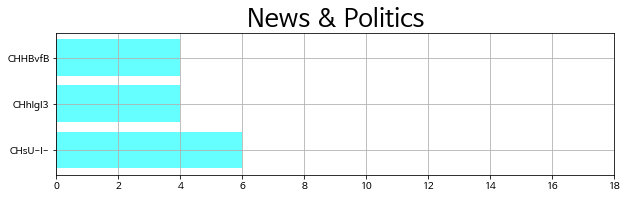

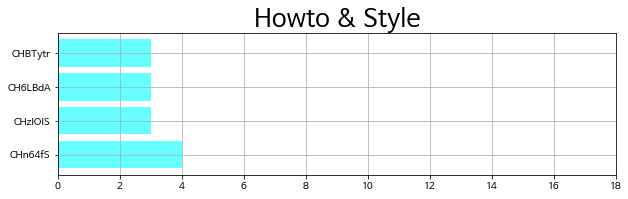

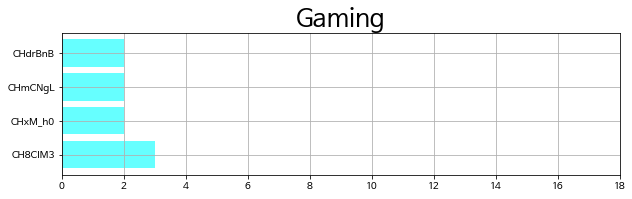

In [43]:
Com = pd.DataFrame(Comedy.channel_id.value_counts())
Com = Com[Com.channel_id>2]
New = pd.DataFrame(News_Politics.channel_id.value_counts())
New = New[New.channel_id>3]
How = pd.DataFrame(Howto_Style.channel_id.value_counts())
How = How[How.channel_id>2]
Gam = pd.DataFrame(Gaming.channel_id.value_counts())
Gam = Gam[Gam.channel_id>1]

val = [i for i in range(0,20,2)]

cat = {'Comedy': Com, 'News & Politics': New, 'Howto & Style': How, 'Gaming': Gam}
for idx, i in enumerate(cat.keys()):
    fig = plt.figure(figsize = (10,12))
    ax = fig.add_subplot(4,1,idx+1)
    plt.barh(cat[i].index, cat[i].channel_id, color=color)
    plt.title(f'{i}', fontsize=25)
    plt.xticks(val)
    plt.grid(True)
    plt.show()

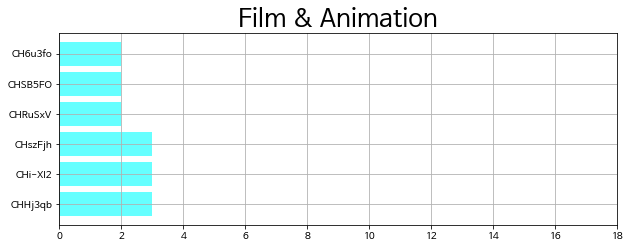

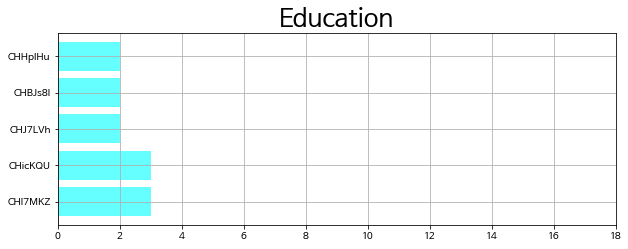

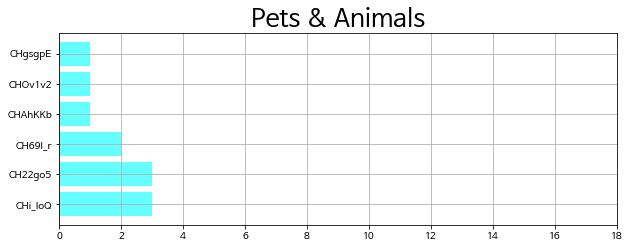

In [44]:
Fil = pd.DataFrame(Film_Animation.channel_id.value_counts())
Fil = Fil[Fil.channel_id>1]
Edu = pd.DataFrame(Education.channel_id.value_counts())
Edu = Edu[Edu.channel_id>1]
Pet = pd.DataFrame(Pets_Animals.channel_id.value_counts())
Pet = Pet[Pet.channel_id>0]

val = [i for i in range(0,20,2)]

cat = {'Film & Animation': Fil, 'Education': Edu, 'Pets & Animals': Pet}
for idx, i in enumerate(cat.keys()):
    fig = plt.figure(figsize = (10,12))
    ax = fig.add_subplot(3,1,idx+1)
    plt.barh(cat[i].index, cat[i].channel_id, color=color)
    plt.title(f'{i}', fontsize=25)
    plt.xticks(val)
    plt.grid(True)
    plt.show()

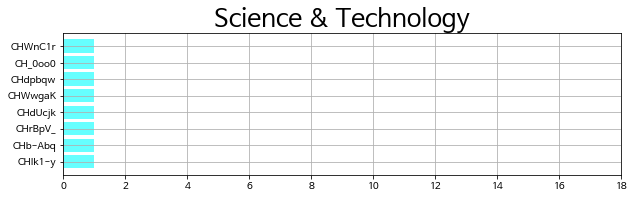

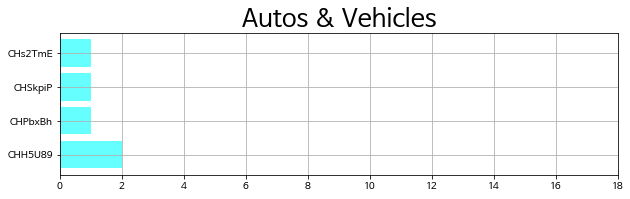

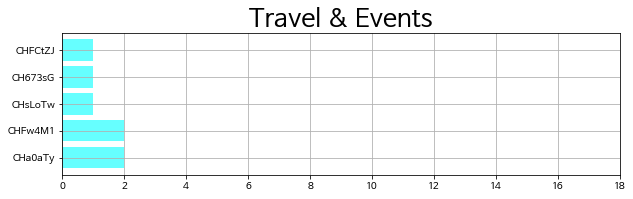

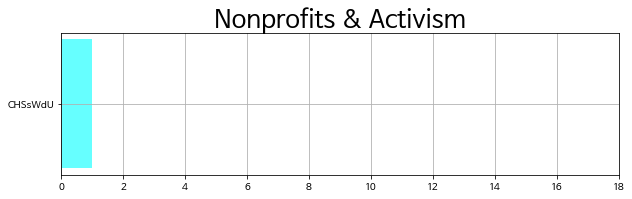

In [45]:
Sci = pd.DataFrame(Science_Technology.channel_id.value_counts())
Sci = Sci[Sci.channel_id>0]
Aut = pd.DataFrame(Autos_Vehicles.channel_id.value_counts())
Aut = Aut[Aut.channel_id>0]
Tra = pd.DataFrame(Travel_Events.channel_id.value_counts())
Tra = Tra[Tra.channel_id>0]
Non = pd.DataFrame(Nonprofits_Activism.channel_id.value_counts())
Non = Non[Non.channel_id>0]

val = [i for i in range(0,20,2)]

cat = {'Science & Technology': Sci, 'Autos & Vehicles': Aut, 'Travel & Events': Tra, 'Nonprofits & Activism': Non}
for idx, i in enumerate(cat.keys()):
    fig = plt.figure(figsize = (10,12))
    ax = fig.add_subplot(4,1,idx+1)
    plt.barh(cat[i].index, cat[i].channel_id, color=color)
    plt.title(f'{i}', fontsize=25)
    plt.xticks(val)
    plt.grid(True)
    plt.show()

### 6월

In [46]:
data = june
color='#404040'

In [47]:
list(data.category_name.value_counts())

[221, 119, 69, 59, 31, 31, 27, 27, 21, 18, 15, 7, 7, 3]

In [48]:
percent = [round((i/len(data))*100, 2) for i in list(data.category_name.value_counts())]

In [49]:
percent

[33.74,
 18.17,
 10.53,
 9.01,
 4.73,
 4.73,
 4.12,
 4.12,
 3.21,
 2.75,
 2.29,
 1.07,
 1.07,
 0.46]

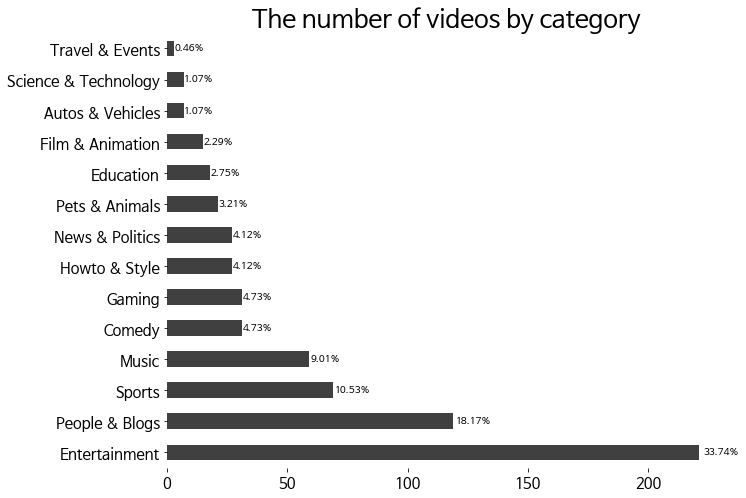

In [50]:
CountStatus = data.value_counts(data.category_name.values, sort=True)
ax = CountStatus.plot.barh(figsize=(10,8), fontsize=15, color=color)
plt.title('The number of videos by category', fontsize=25)
for p,i in zip(ax.patches, percent):
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, f'{i}%', va='center')
plt.sca(ax)
plt.box(False)
plt.show()

In [51]:
Entertainment = data[data.category_name=='Entertainment']
Sports = data[data.category_name=='Sports']
Music = data[data.category_name=='Music']
People_Blogs = data[data.category_name=='People & Blogs']
Science_Technology = data[data.category_name=='Science & Technology']
Education = data[data.category_name=='Education']
Howto_Style = data[data.category_name=='Howto & Style']
News_Politics = data[data.category_name=='News & Politics']
Gaming = data[data.category_name=='Gaming']
Comedy = data[data.category_name=='Comedy']
Pets_Animals = data[data.category_name=='Pets & Animals']
Travel_Events = data[data.category_name=='Travel & Events']
Film_Animation = data[data.category_name=='Film & Animation']
Autos_Vehicles = data[data.category_name=='Autos & Vehicles']
Nonprofits_Activism = data[data.category_name=='Nonprofits & Activism']

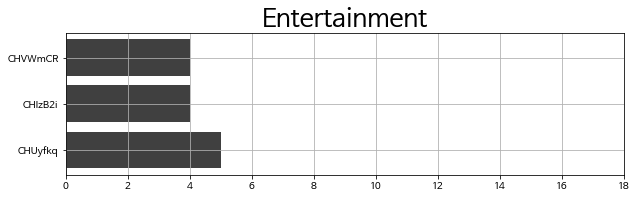

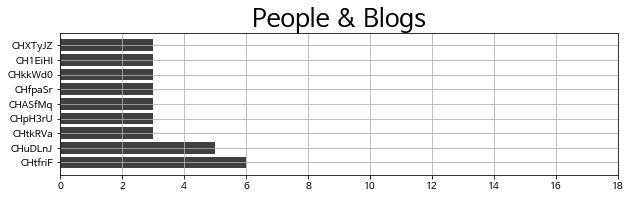

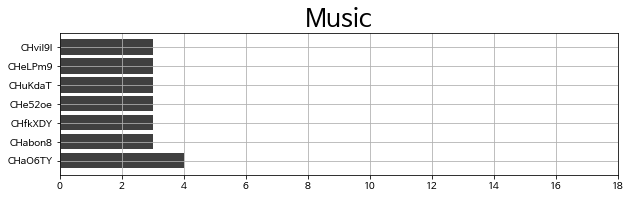

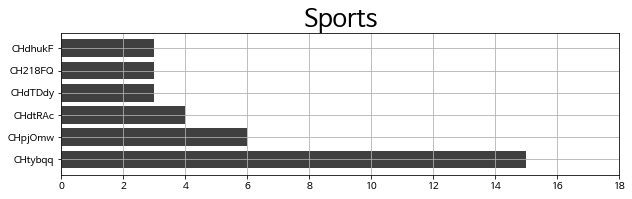

<Figure size 432x288 with 0 Axes>

In [52]:
Ent = pd.DataFrame(Entertainment.channel_id.value_counts())
Ent = Ent[Ent.channel_id>3]
Peo = pd.DataFrame(People_Blogs.channel_id.value_counts())
Peo = Peo[Peo.channel_id>2]
Mus = pd.DataFrame(Music.channel_id.value_counts())
Mus = Mus[Mus.channel_id>2]
Spo = pd.DataFrame(Sports.channel_id.value_counts())
Spo = Spo[Spo.channel_id>2]

val = [i for i in range(0,20,2)]

cat = [Ent, Peo, Mus, Spo]
cat = {'Entertainment': Ent, 'People & Blogs': Peo, 'Music': Mus, 'Sports': Spo}
for idx, i in enumerate(cat.keys()):
    fig = plt.figure(figsize = (10,12))
    ax = fig.add_subplot(4,1,idx+1)
    plt.barh(cat[i].index, cat[i].channel_id, color=color)
    plt.title(f'{i}', fontsize=25)
    plt.xticks(val)
    plt.grid(True)
plt.show()
plt.savefig('./figure/test.png')

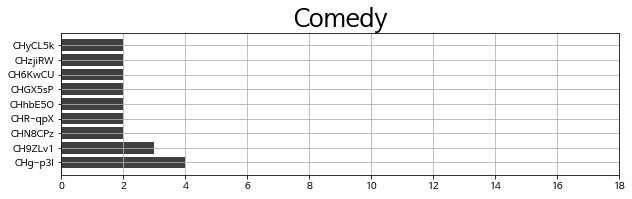

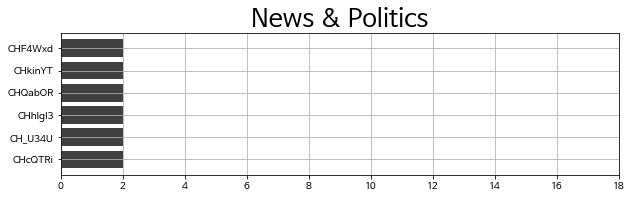

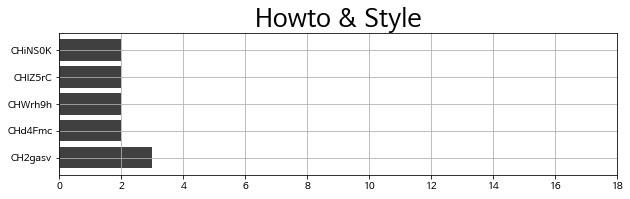

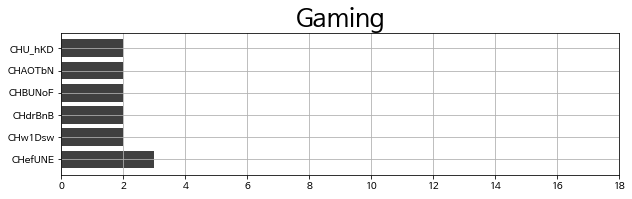

In [53]:
Com = pd.DataFrame(Comedy.channel_id.value_counts())
Com = Com[Com.channel_id>1]
New = pd.DataFrame(News_Politics.channel_id.value_counts())
New = New[New.channel_id>1]
How = pd.DataFrame(Howto_Style.channel_id.value_counts())
How = How[How.channel_id>1]
Gam = pd.DataFrame(Gaming.channel_id.value_counts())
Gam = Gam[Gam.channel_id>1]

val = [i for i in range(0,20,2)]

cat = {'Comedy': Com, 'News & Politics': New, 'Howto & Style': How, 'Gaming': Gam}
for idx, i in enumerate(cat.keys()):
    fig = plt.figure(figsize = (10,12))
    ax = fig.add_subplot(4,1,idx+1)
    plt.barh(cat[i].index, cat[i].channel_id, color=color)
    plt.title(f'{i}', fontsize=25)
    plt.xticks(val)
    plt.grid(True)
    plt.show()

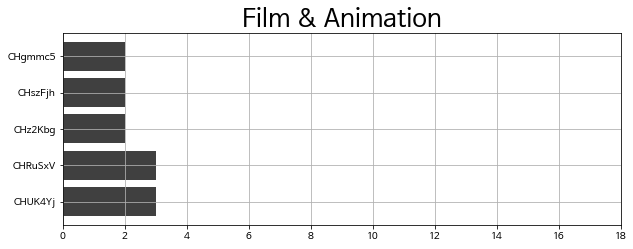

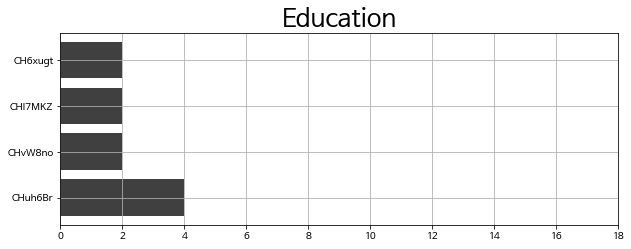

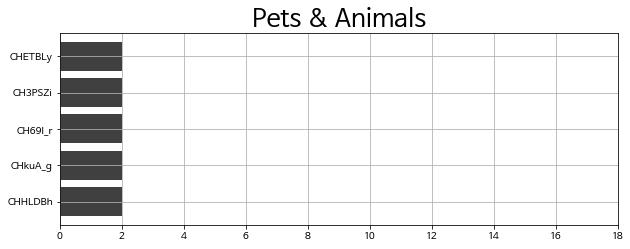

In [54]:
Fil = pd.DataFrame(Film_Animation.channel_id.value_counts())
Fil = Fil[Fil.channel_id>1]
Edu = pd.DataFrame(Education.channel_id.value_counts())
Edu = Edu[Edu.channel_id>1]
Pet = pd.DataFrame(Pets_Animals.channel_id.value_counts())
Pet = Pet[Pet.channel_id>1]

val = [i for i in range(0,20,2)]

cat = {'Film & Animation': Fil, 'Education': Edu, 'Pets & Animals': Pet}
for idx, i in enumerate(cat.keys()):
    fig = plt.figure(figsize = (10,12))
    ax = fig.add_subplot(3,1,idx+1)
    plt.barh(cat[i].index, cat[i].channel_id, color=color)
    plt.title(f'{i}', fontsize=25)
    plt.xticks(val)
    plt.grid(True)
    plt.show()

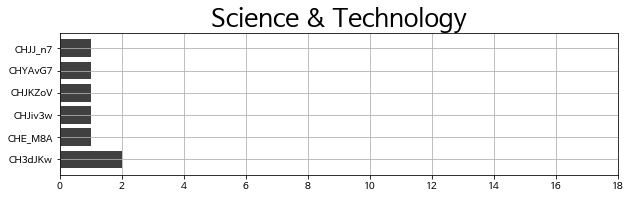

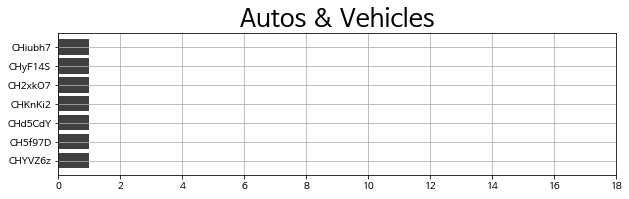

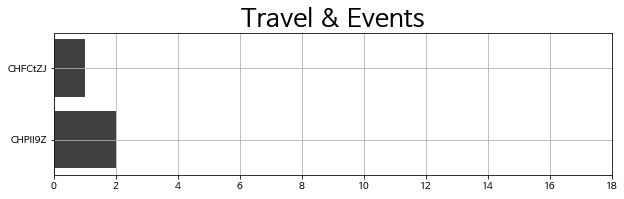

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


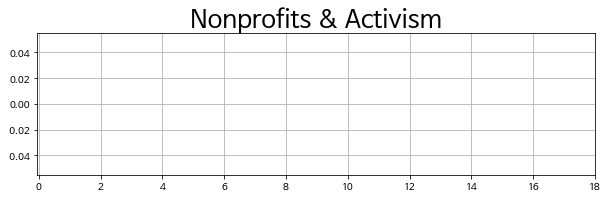

In [55]:
Sci = pd.DataFrame(Science_Technology.channel_id.value_counts())
Sci = Sci[Sci.channel_id>0]
Aut = pd.DataFrame(Autos_Vehicles.channel_id.value_counts())
Aut = Aut[Aut.channel_id>0]
Tra = pd.DataFrame(Travel_Events.channel_id.value_counts())
Tra = Tra[Tra.channel_id>0]
Non = pd.DataFrame(Nonprofits_Activism.channel_id.value_counts())
Non = Non[Non.channel_id>0]

val = [i for i in range(0,20,2)]

cat = {'Science & Technology': Sci, 'Autos & Vehicles': Aut, 'Travel & Events': Tra, 'Nonprofits & Activism': Non}
for idx, i in enumerate(cat.keys()):
    fig = plt.figure(figsize = (10,12))
    ax = fig.add_subplot(4,1,idx+1)
    plt.barh(cat[i].index, cat[i].channel_id, color=color)
    plt.title(f'{i}', fontsize=25)
    plt.xticks(val)
    plt.grid(True)
    plt.show()

### 7월

In [56]:
data = july
color='#FF9933'

In [57]:
list(data.category_name.value_counts())

[203, 86, 65, 49, 32, 31, 28, 23, 19, 18, 9, 8, 8, 5]

In [58]:
percent = [round((i/len(data))*100, 2) for i in list(data.category_name.value_counts())]

In [59]:
percent

[34.76,
 14.73,
 11.13,
 8.39,
 5.48,
 5.31,
 4.79,
 3.94,
 3.25,
 3.08,
 1.54,
 1.37,
 1.37,
 0.86]

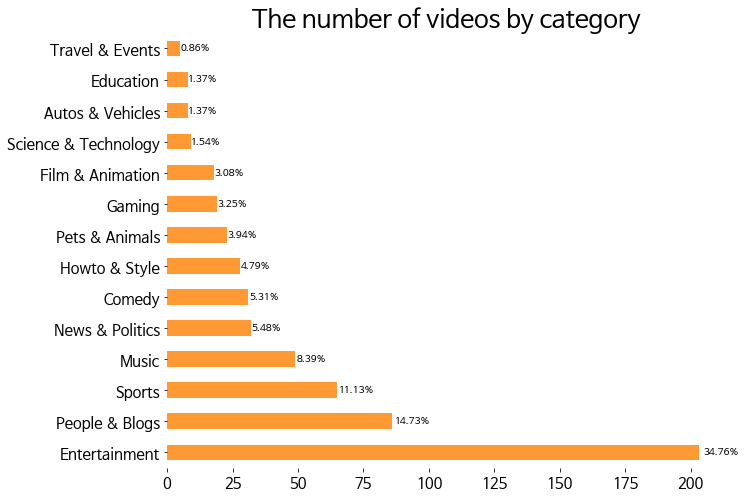

In [60]:
CountStatus = data.value_counts(data.category_name.values, sort=True)
ax = CountStatus.plot.barh(figsize=(10,8), fontsize=15, color=color)
plt.title('The number of videos by category', fontsize=25)
for p,i in zip(ax.patches, percent):
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, f'{i}%', va='center')
plt.sca(ax)
plt.box(False)
plt.show()

In [61]:
Entertainment = data[data.category_name=='Entertainment']
Sports = data[data.category_name=='Sports']
Music = data[data.category_name=='Music']
People_Blogs = data[data.category_name=='People & Blogs']
Science_Technology = data[data.category_name=='Science & Technology']
Education = data[data.category_name=='Education']
Howto_Style = data[data.category_name=='Howto & Style']
News_Politics = data[data.category_name=='News & Politics']
Gaming = data[data.category_name=='Gaming']
Comedy = data[data.category_name=='Comedy']
Pets_Animals = data[data.category_name=='Pets & Animals']
Travel_Events = data[data.category_name=='Travel & Events']
Film_Animation = data[data.category_name=='Film & Animation']
Autos_Vehicles = data[data.category_name=='Autos & Vehicles']
Nonprofits_Activism = data[data.category_name=='Nonprofits & Activism']

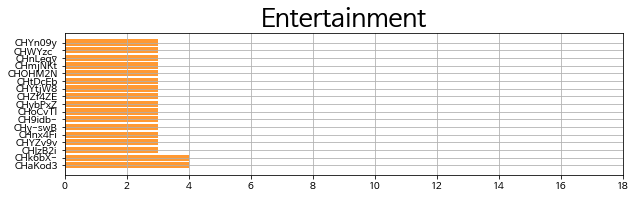

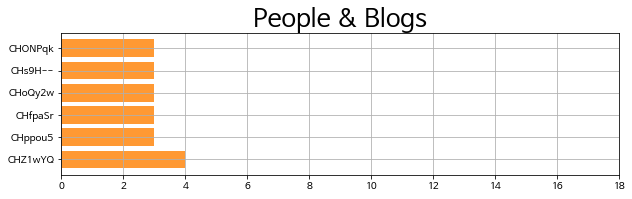

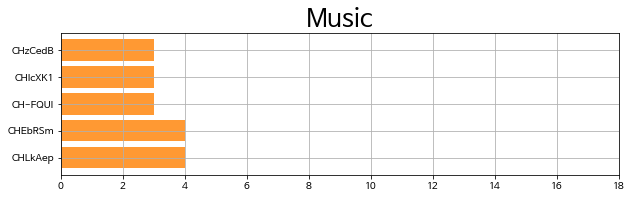

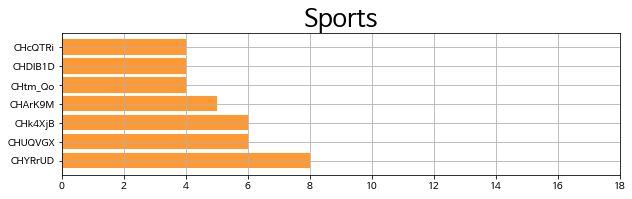

<Figure size 432x288 with 0 Axes>

In [62]:
Ent = pd.DataFrame(Entertainment.channel_id.value_counts())
Ent = Ent[Ent.channel_id>2]
Peo = pd.DataFrame(People_Blogs.channel_id.value_counts())
Peo = Peo[Peo.channel_id>2]
Mus = pd.DataFrame(Music.channel_id.value_counts())
Mus = Mus[Mus.channel_id>2]
Spo = pd.DataFrame(Sports.channel_id.value_counts())
Spo = Spo[Spo.channel_id>3]

val = [i for i in range(0,20,2)]

cat = [Ent, Peo, Mus, Spo]
cat = {'Entertainment': Ent, 'People & Blogs': Peo, 'Music': Mus, 'Sports': Spo}
for idx, i in enumerate(cat.keys()):
    fig = plt.figure(figsize = (10,12))
    ax = fig.add_subplot(4,1,idx+1)
    plt.barh(cat[i].index, cat[i].channel_id, color=color)
    plt.title(f'{i}', fontsize=25)
    plt.xticks(val)
    plt.grid(True)
plt.show()
plt.savefig('./figure/test.png')

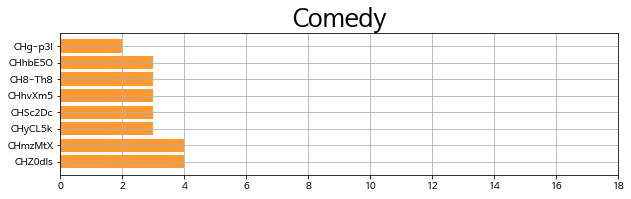

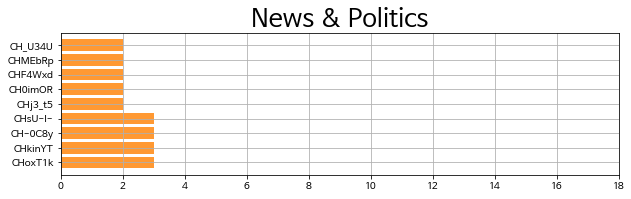

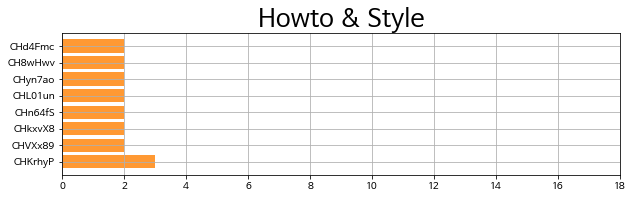

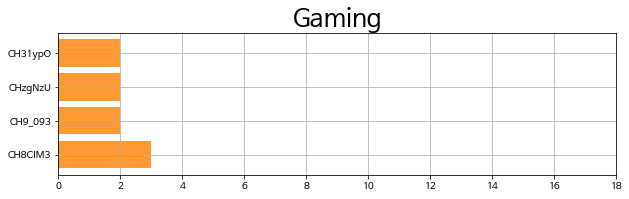

In [63]:
Com = pd.DataFrame(Comedy.channel_id.value_counts())
Com = Com[Com.channel_id>1]
New = pd.DataFrame(News_Politics.channel_id.value_counts())
New = New[New.channel_id>1]
How = pd.DataFrame(Howto_Style.channel_id.value_counts())
How = How[How.channel_id>1]
Gam = pd.DataFrame(Gaming.channel_id.value_counts())
Gam = Gam[Gam.channel_id>1]

val = [i for i in range(0,20,2)]

cat = {'Comedy': Com, 'News & Politics': New, 'Howto & Style': How, 'Gaming': Gam}
for idx, i in enumerate(cat.keys()):
    fig = plt.figure(figsize = (10,12))
    ax = fig.add_subplot(4,1,idx+1)
    plt.barh(cat[i].index, cat[i].channel_id, color=color)
    plt.title(f'{i}', fontsize=25)
    plt.xticks(val)
    plt.grid(True)
    plt.show()

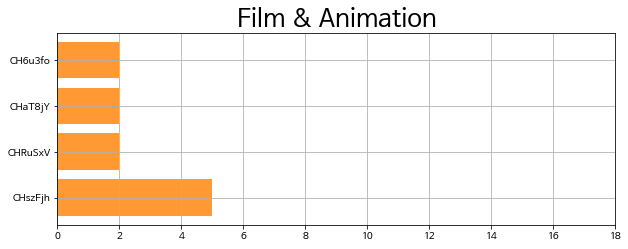

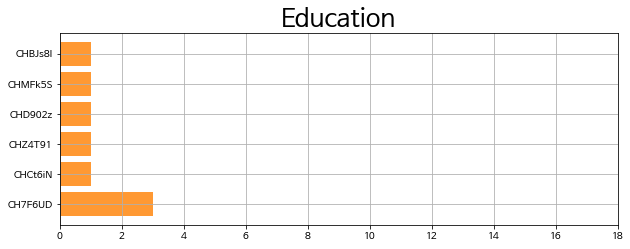

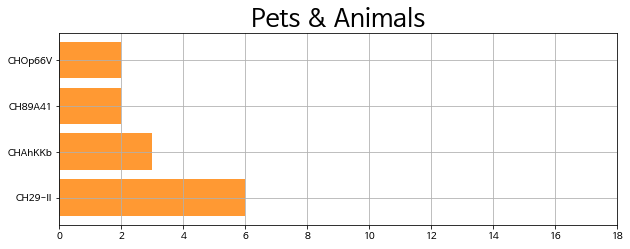

In [64]:
Fil = pd.DataFrame(Film_Animation.channel_id.value_counts())
Fil = Fil[Fil.channel_id>1]
Edu = pd.DataFrame(Education.channel_id.value_counts())
Edu = Edu[Edu.channel_id>0]
Pet = pd.DataFrame(Pets_Animals.channel_id.value_counts())
Pet = Pet[Pet.channel_id>1]

val = [i for i in range(0,20,2)]

cat = {'Film & Animation': Fil, 'Education': Edu, 'Pets & Animals': Pet}
for idx, i in enumerate(cat.keys()):
    fig = plt.figure(figsize = (10,12))
    ax = fig.add_subplot(3,1,idx+1)
    plt.barh(cat[i].index, cat[i].channel_id, color=color)
    plt.title(f'{i}', fontsize=25)
    plt.xticks(val)
    plt.grid(True)
    plt.show()

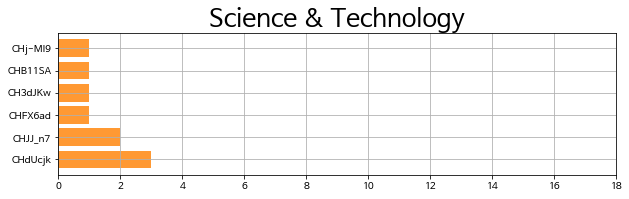

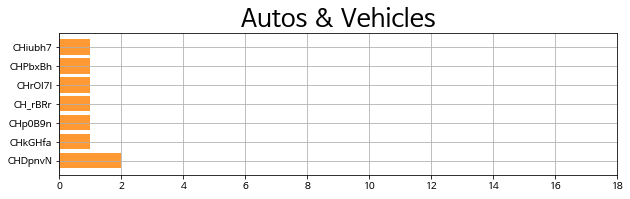

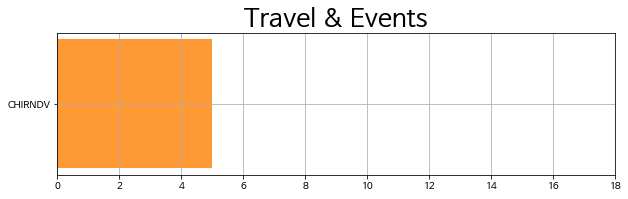

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


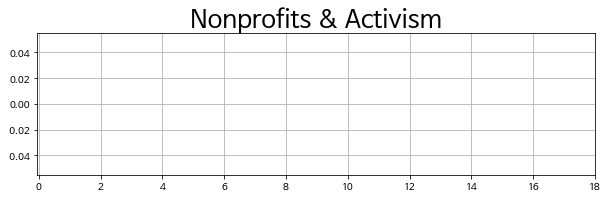

In [65]:
Sci = pd.DataFrame(Science_Technology.channel_id.value_counts())
Sci = Sci[Sci.channel_id>0]
Aut = pd.DataFrame(Autos_Vehicles.channel_id.value_counts())
Aut = Aut[Aut.channel_id>0]
Tra = pd.DataFrame(Travel_Events.channel_id.value_counts())
Tra = Tra[Tra.channel_id>0]
Non = pd.DataFrame(Nonprofits_Activism.channel_id.value_counts())
Non = Non[Non.channel_id>0]

val = [i for i in range(0,20,2)]

cat = {'Science & Technology': Sci, 'Autos & Vehicles': Aut, 'Travel & Events': Tra, 'Nonprofits & Activism': Non}
for idx, i in enumerate(cat.keys()):
    fig = plt.figure(figsize = (10,12))
    ax = fig.add_subplot(4,1,idx+1)
    plt.barh(cat[i].index, cat[i].channel_id, color=color)
    plt.title(f'{i}', fontsize=25)
    plt.xticks(val)
    plt.grid(True)
    plt.show()

## 월별 TOP10

In [66]:
data = april
color = '#B266FF'

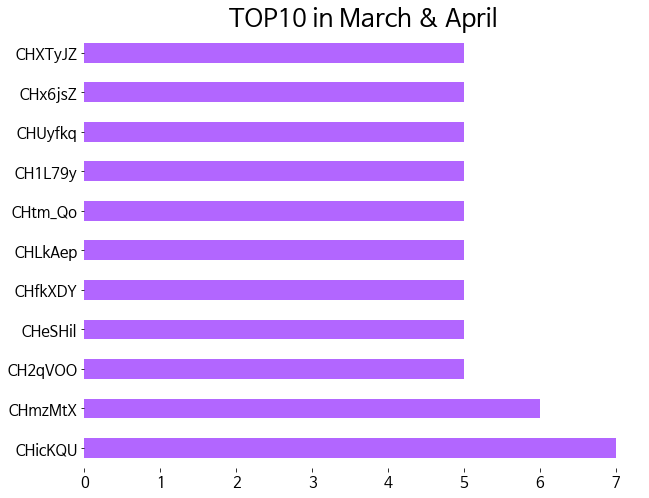

In [67]:
# CountStatus = data.value_counts(data.channel_id.values, sort=True)
CountStatus = data.channel_id.value_counts()[:11]
ax = CountStatus.plot.barh(figsize=(10,8), fontsize=15, color=color)
plt.title('TOP10 in March & April', fontsize=25)
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
plt.sca(ax)
plt.box(False)
plt.show()

In [68]:
data = may
color='#66FFFF'

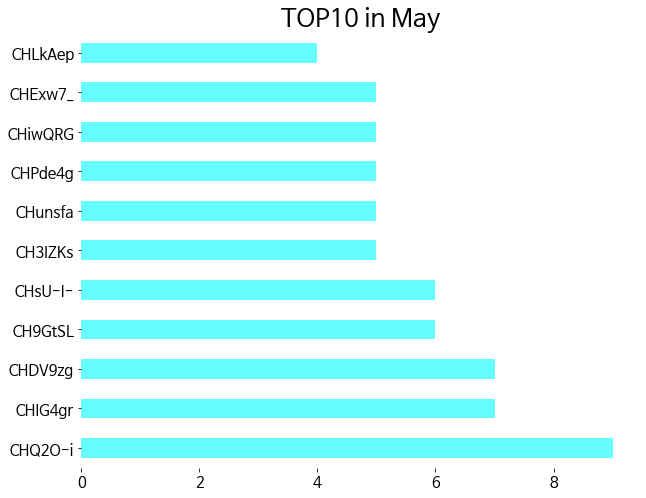

In [69]:
# CountStatus = data.value_counts(data.channel_id.values, sort=True)
CountStatus = data.channel_id.value_counts()[:11]
ax = CountStatus.plot.barh(figsize=(10,8), fontsize=15, color=color)
plt.title('TOP10 in May', fontsize=25)
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
plt.sca(ax)
plt.box(False)
plt.show()

In [70]:
data = june
color='#404040'

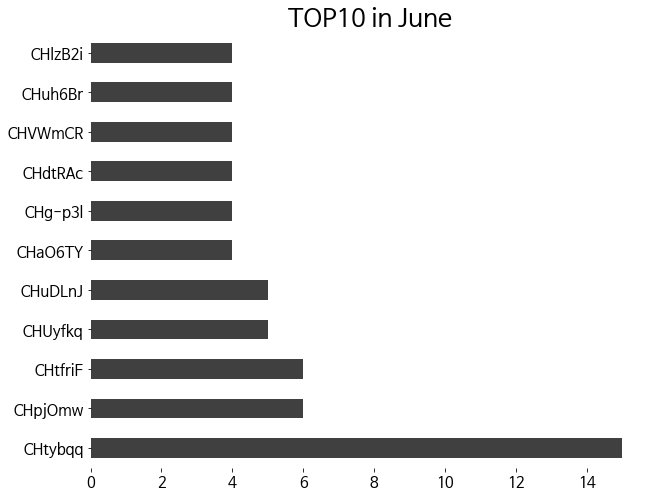

In [71]:
# CountStatus = data.value_counts(data.channel_id.values, sort=True)
CountStatus = data.channel_id.value_counts()[:11]
ax = CountStatus.plot.barh(figsize=(10,8), fontsize=15, color=color)
plt.title('TOP10 in June', fontsize=25)
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
plt.sca(ax)
plt.box(False)
plt.show()

In [72]:
data = july
color='#FF9933'

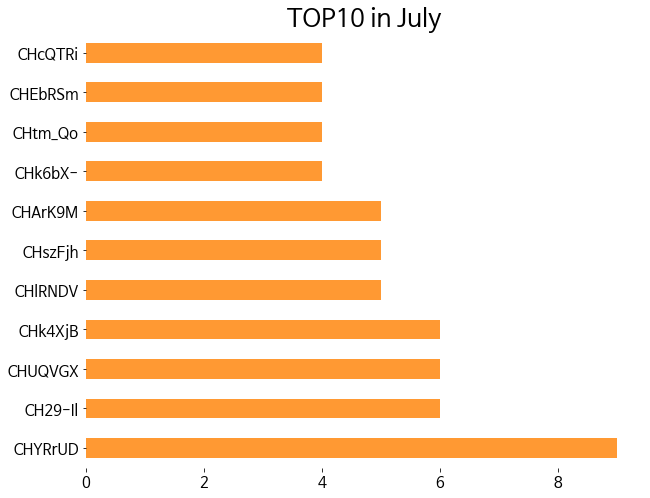

In [73]:
# CountStatus = data.value_counts(data.channel_id.values, sort=True)
CountStatus = data.channel_id.value_counts()[:11]
ax = CountStatus.plot.barh(figsize=(10,8), fontsize=15, color=color)
plt.title('TOP10 in July', fontsize=25)
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
plt.sca(ax)
plt.box(False)
plt.show()

## 주별 TOP10

In [74]:
data = pd.read_csv('./pretest_data.csv')
data['published_date'] = pd.to_datetime(data['published_date'],format='%Y-%m-%d')
data

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
0,V-0db,CH49ta0,2021-07-01,Entertainment,PT8M20S,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...,BTS performs their hit songs ‘Dynamite’ and ‘B...,2021-07-03,2021-07-04,13,...,792,1014,10373,10720,1080000,1080000,685992413,687485021,5947,5950
1,V-1XL,CHZVD--,2021-06-24,Entertainment,PT9M17S,치킨불냉면|치킨|불냉면|냉면,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...,2021-06-26,2021-06-27,28,...,121,154,1083,1173,627000,628000,75327083,75685030,70,70
2,V-4fa,CH9w-h_,2021-07-17,Entertainment,PT7M39S,NaN,"거세 구형, 성 충동 제거를 위한 엄벌 치료 VS 인권 보호해야고민 끝에 내린 강요...",2021-07-19,2021-07-22,1,...,162,233,696,1006,5750000,5750000,5424167911,5431617741,34270,34341
3,V-5ip,CHUQVGX,2021-06-02,Sports,PT6M40S,News Network|SBS SPORTSMUG|SPORTSMUG|스포츠머그|축구|...,세계 최초 9회 연속 올림픽 본선 진출! 그동안 한국 축구의 역사를 써내려 간 올림...,2021-06-04,2021-06-04,18,...,30,30,416,416,94200,94200,71160125,71160125,224,224
4,V-5jn,CHhI3EX,2021-07-06,Sports,PT11M27S,이천수|심판도전기|축구심판,찾아 뵐 심판분들이 이제 18명정도 남았네요,2021-07-08,2021-07-09,11,...,112,143,687,772,47600,49200,6993451,7607123,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,VzwuB,CH69uMh,2021-05-09,Comedy,PT2M34S,아프리카tv|봉준|와꾸대장봉준|BJ|컨텐츠|클립,BJ봉준입니다 저는 2021년 5월 10일 새벽 1시경 동료BJ들과 방송을 진행하던...,2021-05-11,2021-05-14,2,...,22830,42024,19228,28591,1010000,1000000,790006060,792406169,7659,7658
2640,VzxuL,CHhbE5O,2021-07-29,Comedy,PT6M39S,장삐쭈|삐쭈|ㅋㅋㅋ|삐쮸|장삐쮸|병맛더빙|더빙|웃긴동영상|꿀잼|신병|장삐쭈 단편선|...,"스튜디오 장삐쭈장삐쭈, 정영준, 안류천, 포포, 윤성원, 허혜원, 정대준, 지정민,...",2021-07-31,2021-07-31,1,...,558,558,18125,18125,2920000,2920000,1280502681,1280502681,363,363
2641,VzygR,CHO4RG1,2021-04-20,Science & Technology,PT11M45S,아이패드 프로|아이패드 프로5|아이패드 프로 5세대|신형 아이맥|아이맥|iMac|에...,"애플 봄 스페셜 이벤트를 통해서 공개된 아이패드 프로 5세대, 신형 아이맥, 에어태...",2021-04-22,2021-04-22,32,...,46,46,438,438,73100,73100,28123608,28123608,1139,1139
2642,Vzz6W,CHYeeEw,2021-04-26,Entertainment,PT11M27S,고요 속의 외침|뽕숭아학당|슬기로운캠핑생활|아는형님|미스터트롯|임영웅|영탁|장민호|...,비빈 닭↘고↗기 부터이진관 덕후까지레전드 꿀잼!!#뽕숭아학당 #미스터트롯 #고요속의...,2021-04-28,2021-04-29,20,...,67,82,230,281,298000,299000,139692013,140182861,461,464


In [75]:
week1 = data[(data.published_date>='2021-03-25')&(data.published_date<='2021-03-31')]
week2 = data[(data.published_date>='2021-04-01')&(data.published_date<='2021-04-07')]
week3 = data[(data.published_date>='2021-04-08')&(data.published_date<='2021-04-14')]
week4 = data[(data.published_date>='2021-04-15')&(data.published_date<='2021-04-21')]
week5 = data[(data.published_date>='2021-04-22')&(data.published_date<='2021-04-28')]
week6 = data[(data.published_date>='2021-04-29')&(data.published_date<='2021-05-05')]
week7 = data[(data.published_date>='2021-05-06')&(data.published_date<='2021-05-12')]
week8 = data[(data.published_date>='2021-05-13')&(data.published_date<='2021-05-19')]
week9 = data[(data.published_date>='2021-05-20')&(data.published_date<='2021-05-26')]
week10 = data[(data.published_date>='2021-05-27')&(data.published_date<='2021-06-02')]
week11 = data[(data.published_date>='2021-06-03')&(data.published_date<='2021-06-09')]
week12 = data[(data.published_date>='2021-06-10')&(data.published_date<='2021-06-16')]
week13 = data[(data.published_date>='2021-06-17')&(data.published_date<='2021-06-23')]
week14 = data[(data.published_date>='2021-06-24')&(data.published_date<='2021-06-30')]
week15 = data[(data.published_date>='2021-07-01')&(data.published_date<='2021-07-07')]
week16 = data[(data.published_date>='2021-07-08')&(data.published_date<='2021-07-14')]
week17 = data[(data.published_date>='2021-07-15')&(data.published_date<='2021-07-21')]
week18 = data[(data.published_date>='2021-07-22')&(data.published_date<='2021-07-29')]

In [76]:
week_ = [week1, week2, week3, week4, week5, week6, week7, week8, week9, week10, week11, week12, week13, week14, week15, week16, week17, week18]

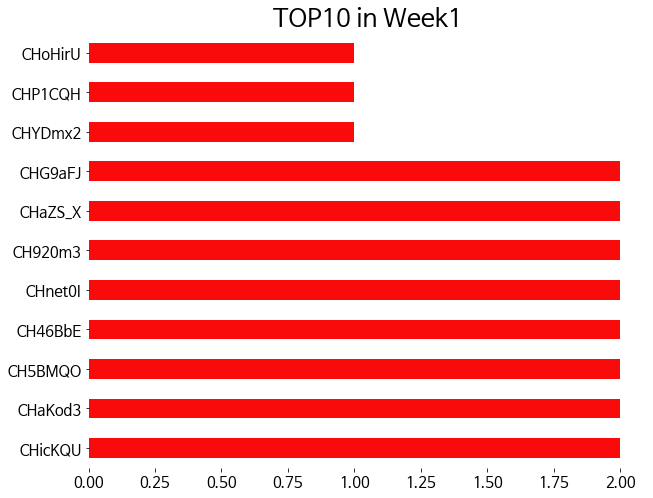

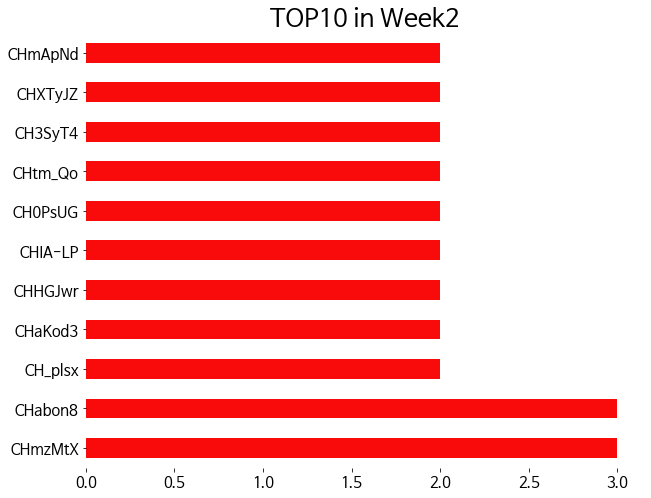

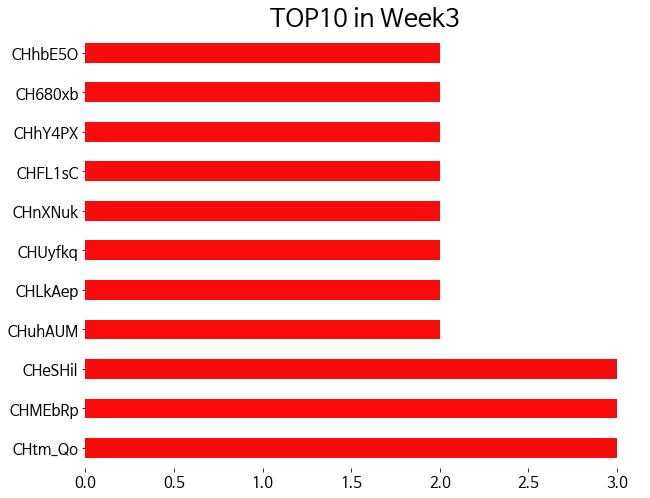

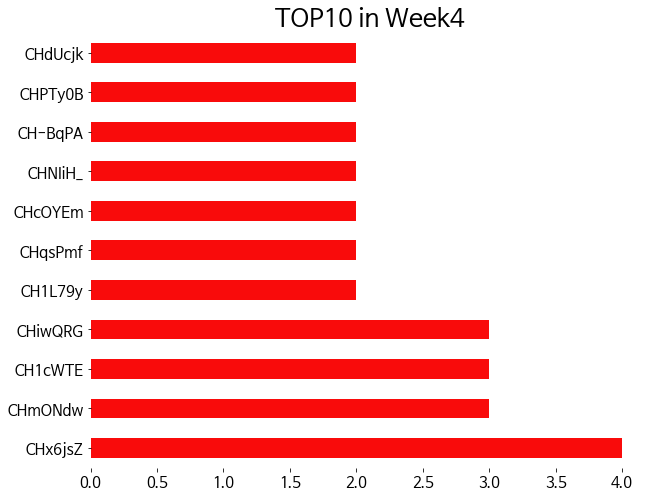

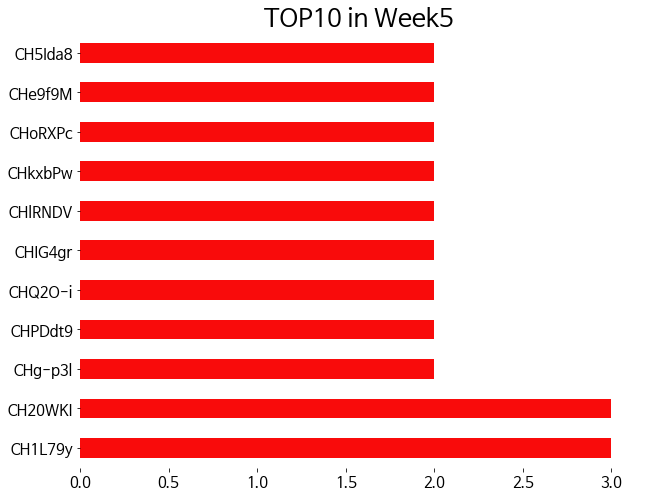

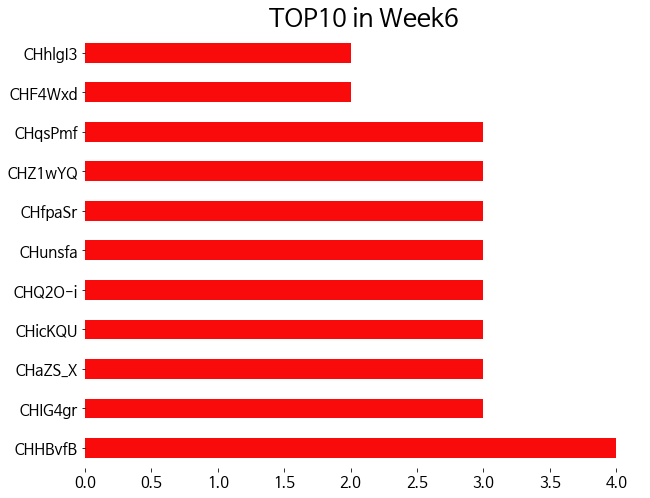

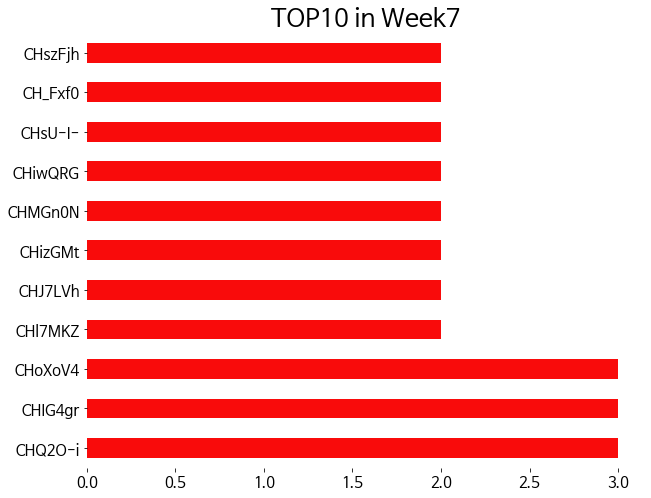

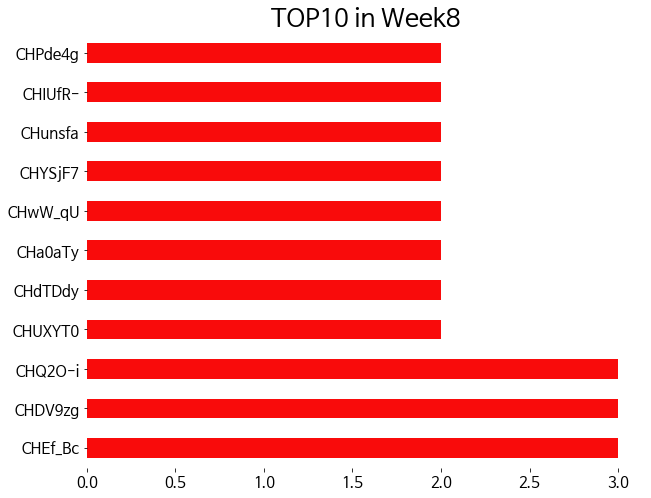

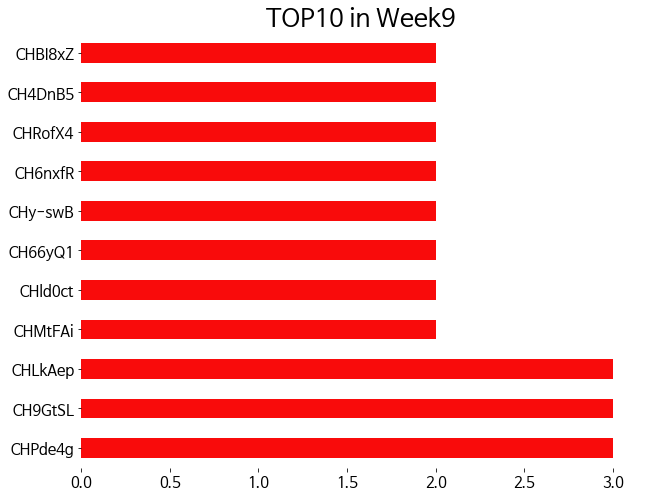

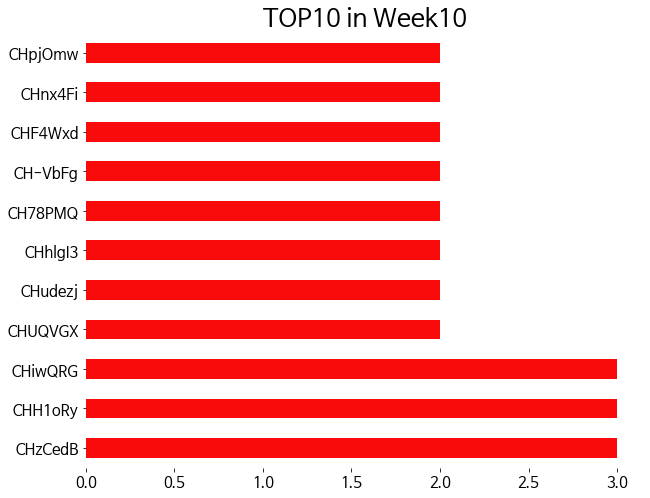

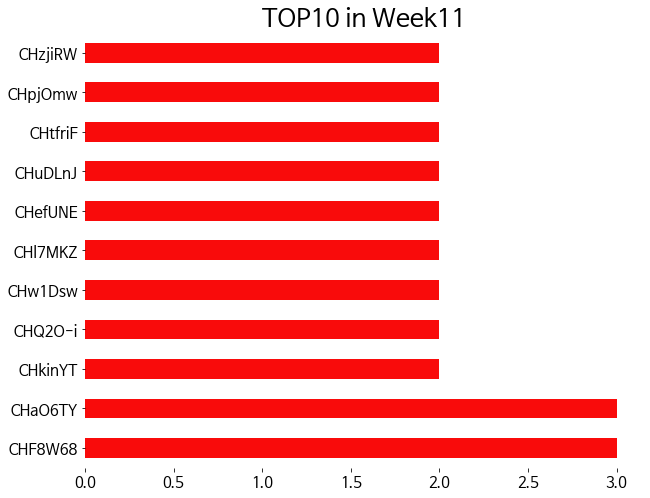

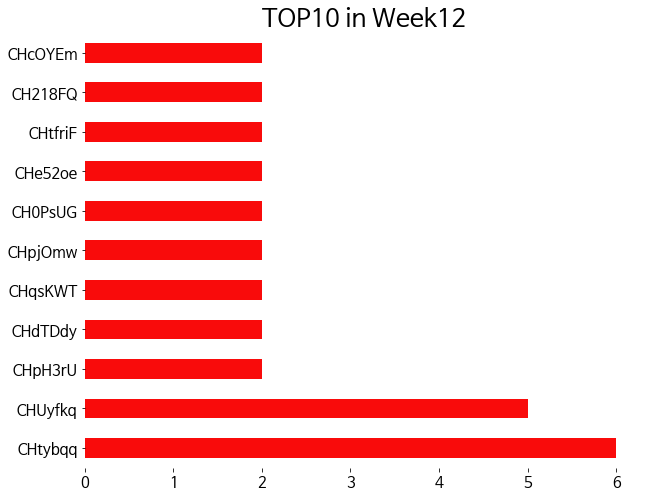

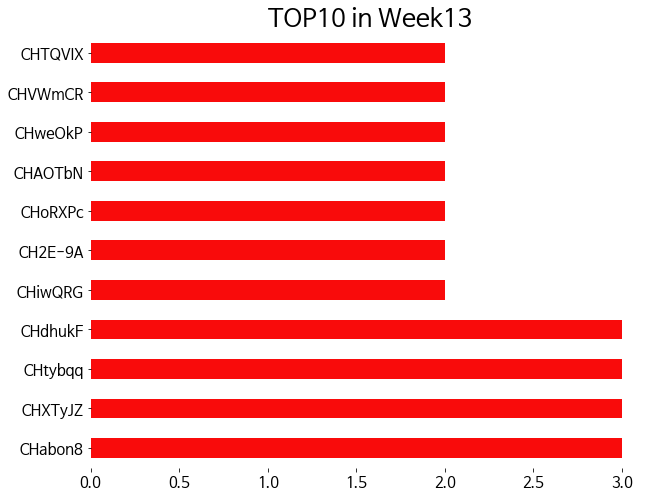

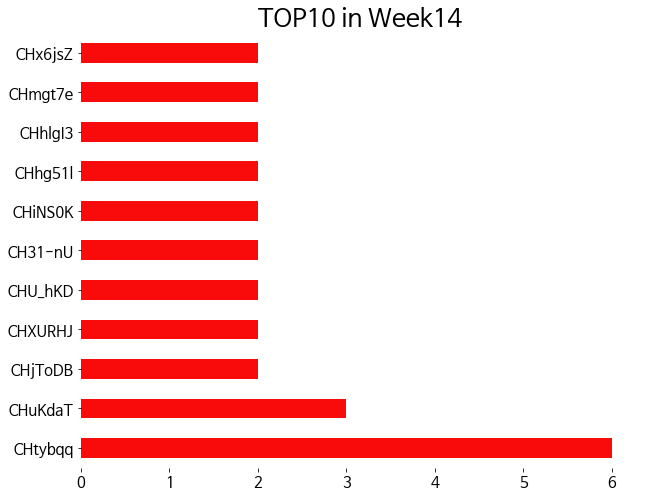

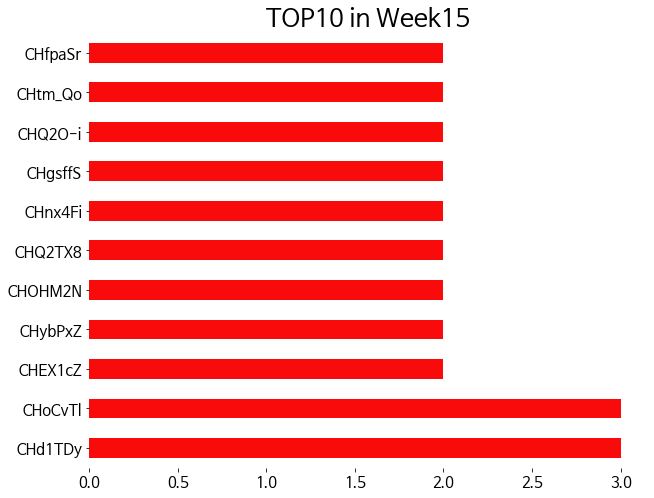

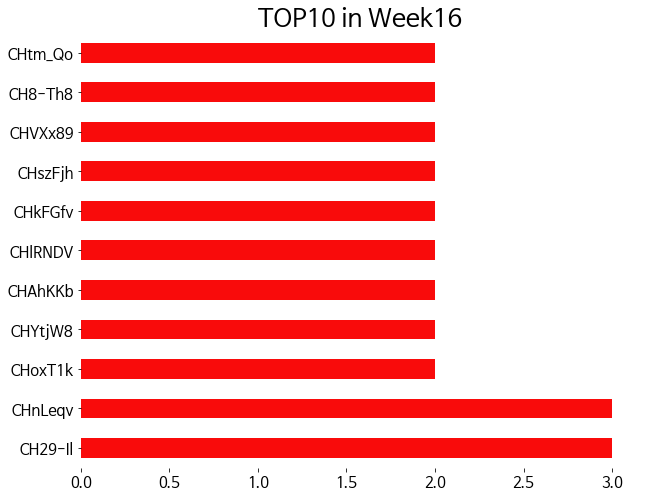

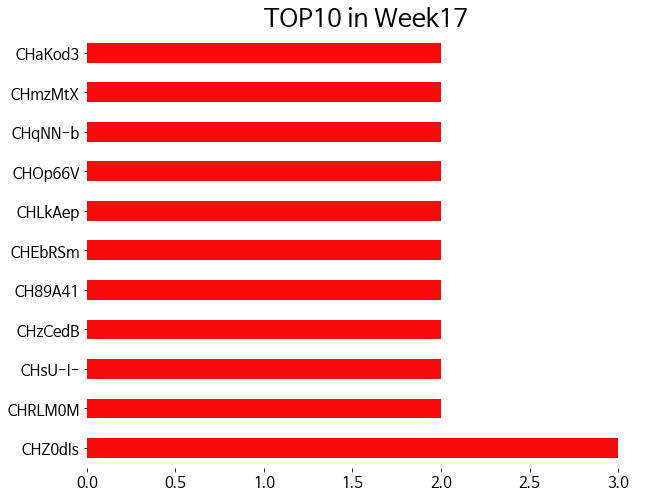

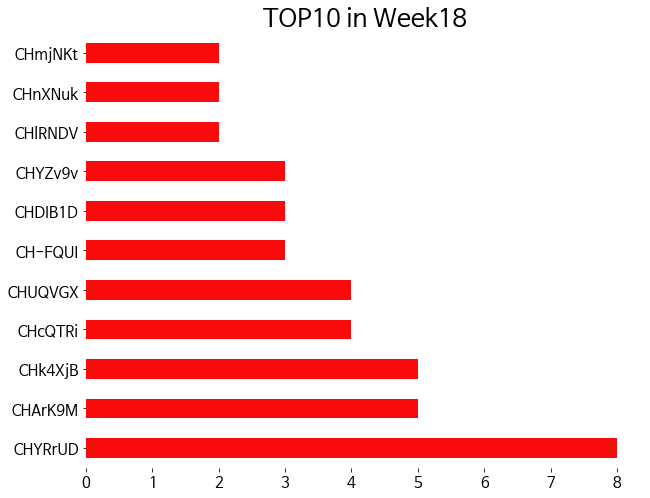

In [77]:
color = '#F90B0B'
for idx, i in enumerate(week_):
    data = i
    CountStatus = data.channel_id.value_counts()[:11]
    ax = CountStatus.plot.barh(figsize=(10,8), fontsize=15, color=color)
    plt.title(f'TOP10 in Week{idx+1}', fontsize=25)
    for p in ax.patches:
        x, y, width, height = p.get_bbox().bounds
    plt.sca(ax)
    plt.box(False)
    plt.show()

## 월별 카테고리별 키워드 순위

In [78]:
data = april
color = '#B266FF'

In [79]:
Entertainment = data[data.category_name=='Entertainment']
Sports = data[data.category_name=='Sports']
Music = data[data.category_name=='Music']
People_Blogs = data[data.category_name=='People & Blogs']
Science_Technology = data[data.category_name=='Science & Technology']
Education = data[data.category_name=='Education']
Howto_Style = data[data.category_name=='Howto & Style']
News_Politics = data[data.category_name=='News & Politics']
Gaming = data[data.category_name=='Gaming']
Comedy = data[data.category_name=='Comedy']
Pets_Animals = data[data.category_name=='Pets & Animals']
Travel_Events = data[data.category_name=='Travel & Events']
Film_Animation = data[data.category_name=='Film & Animation']
Autos_Vehicles = data[data.category_name=='Autos & Vehicles']
Nonprofits_Activism = data[data.category_name=='Nonprofits & Activism']

In [80]:
list_1 = [Entertainment, Sports, Music, People_Blogs, Science_Technology, Education, Howto_Style, News_Politics,
         Gaming, Comedy, Pets_Animals, Travel_Events, Film_Animation, Autos_Vehicles]
list_1_ = ['Entertainment', 'Sports', 'Music', 'People & Blogs', 'Science & Technology', 'Education', 'Howto & Style', 'News & Politics', 'Gaming', 'Comedy', 
           'Pets & Animals', 'Travel & Events', 'Film & Animation', 'Autos & Vehicles']

# list_2 = [Entertainment, Sports, Music, People_Blogs, Science_Technology, Education, Howto_Style, News_Politics,
#          Gaming, Comedy, Pets_Animals, Travel_Events, Film_Animation, Autos_Vehicles, Nonprofits_Activism]
# list_2_ = ['Entertainment', 'Sports', 'Music', 'People & Blogs', 'Science & Technology', 'Education', 'Howto & Style', 'News & Politics', 'Gaming', 'Comedy', 
#            'Pets & Animals', 'Travel & Events', 'Film & Animation', 'Autos & Vehicles', 'Nonprofits & Activism']

In [81]:
def tag_plot(data, cate, name):
    cate = cate.dropna(subset=['tags'])
    tags = []

    for i in list(cate.tags):
        tag_list = i.split('|')
        for j in tag_list:
            tags.append(j)

    tags_set = list(set(tags))
    tags_vc = dict()

    for i in tags_set:
        tags_vc[i] = tags.count(i)

    sorted_dict = {k: v for k, v in sorted(tags_vc.items(), key=lambda item: item[1], reverse=True)}
    SD = pd.Series(sorted_dict)[:10]

    # CountStatus = data.value_counts(data.category_name.values, sort=True)
    ax = SD.plot.barh(figsize=(10,8), fontsize=15, color=color)
    plt.title(name, fontsize=25)
    for p in ax.patches:
        x, y, width, height = p.get_bbox().bounds

    plt.sca(ax)
    plt.box(False)
    plt.show()

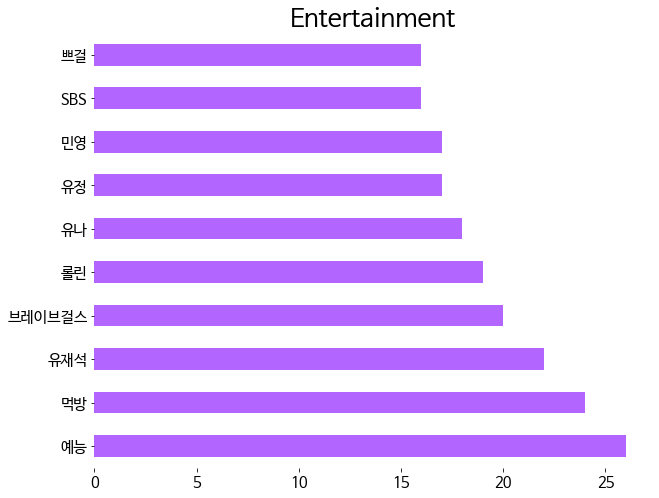

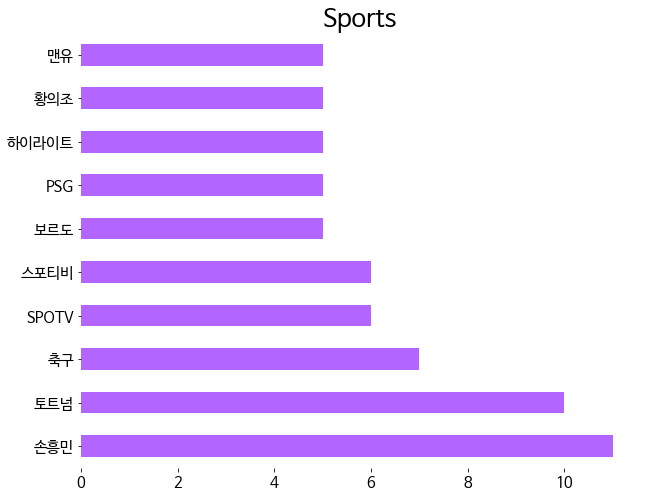

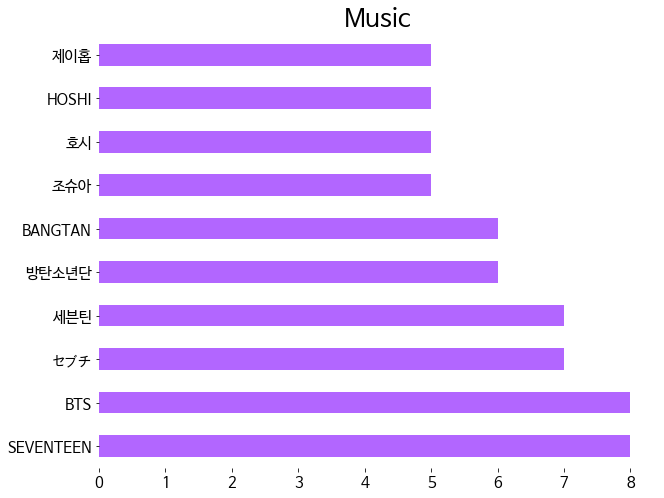

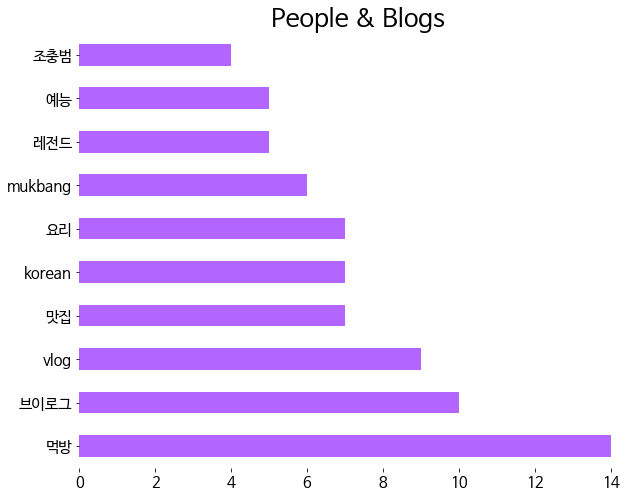

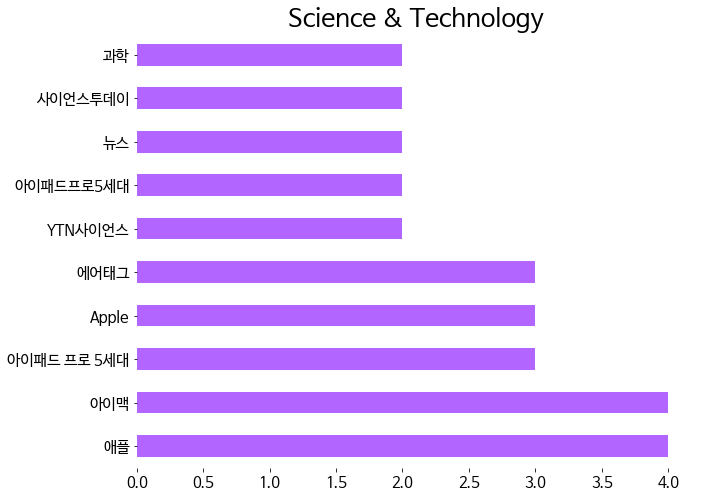

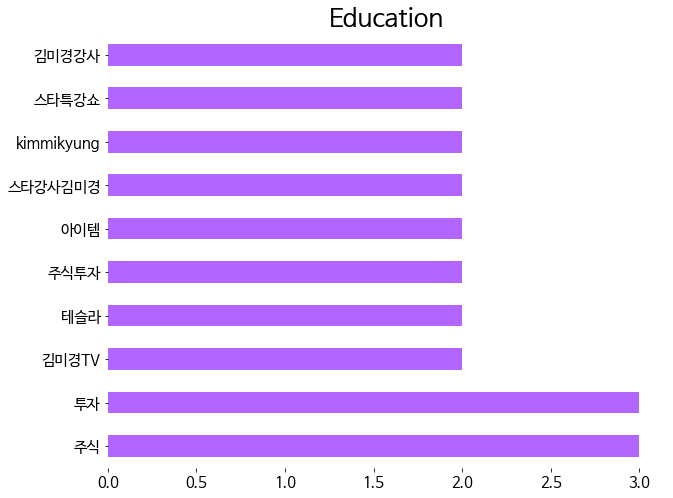

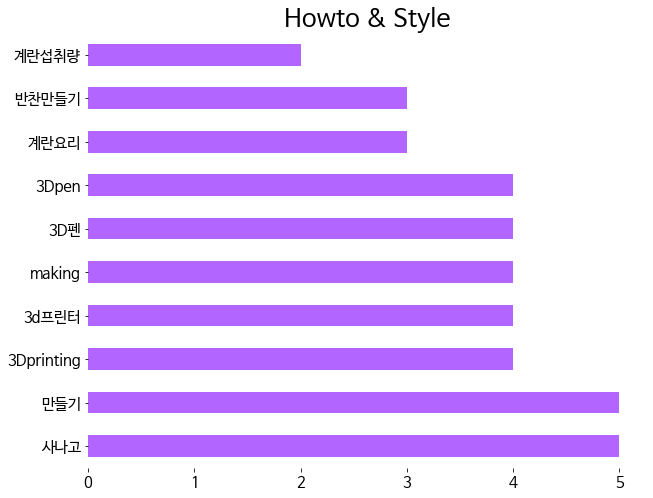

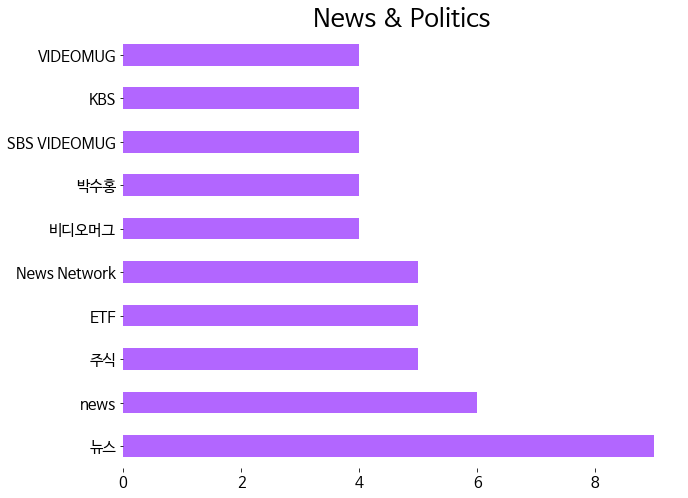

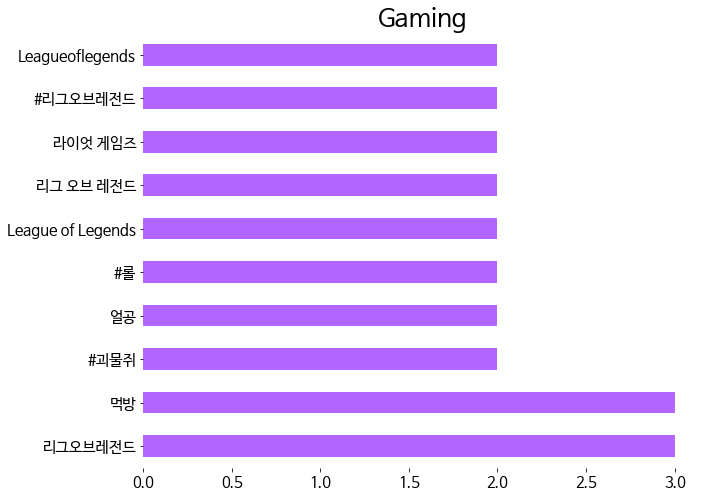

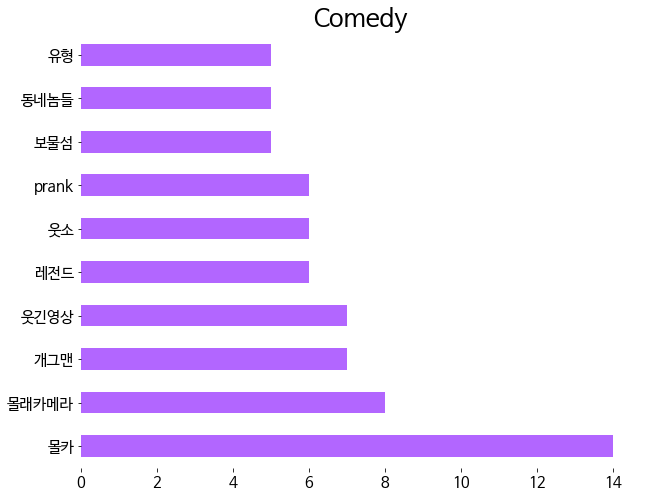

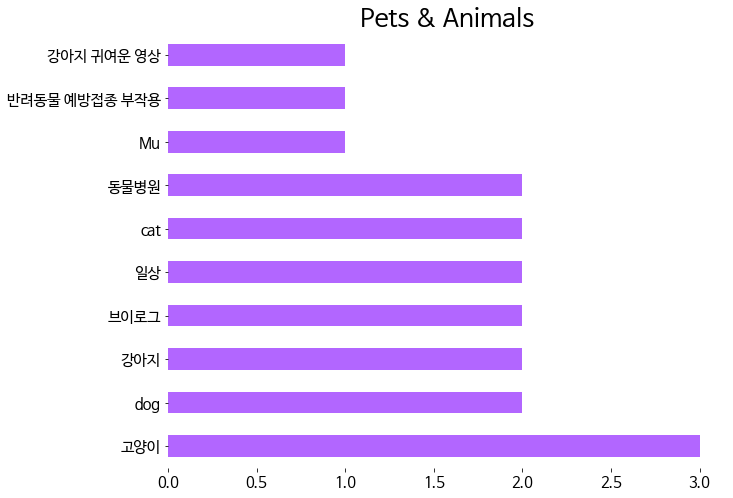

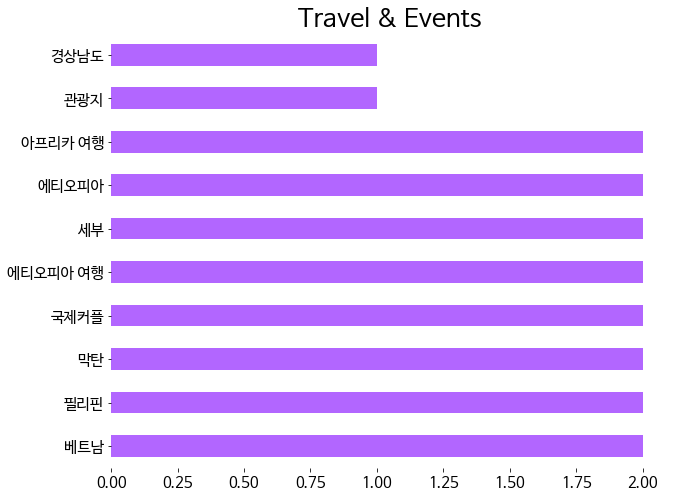

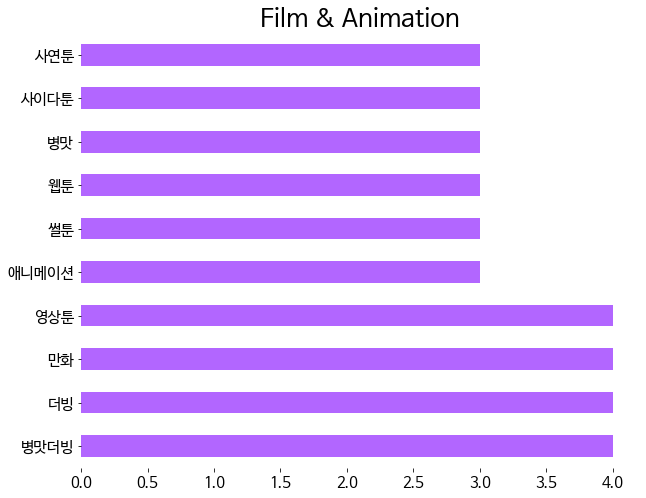

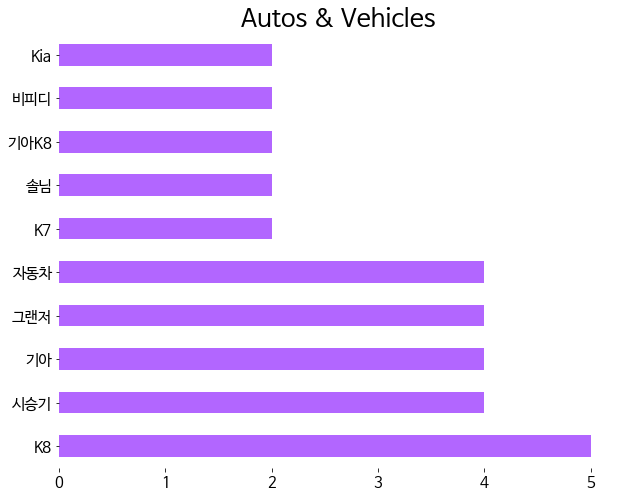

In [82]:
for i,j in zip(list_1, list_1_):
    tag_plot(data,i,j)

In [83]:
data = may
color='#66FFFF'

In [84]:
Entertainment = data[data.category_name=='Entertainment']
Sports = data[data.category_name=='Sports']
Music = data[data.category_name=='Music']
People_Blogs = data[data.category_name=='People & Blogs']
Science_Technology = data[data.category_name=='Science & Technology']
Education = data[data.category_name=='Education']
Howto_Style = data[data.category_name=='Howto & Style']
News_Politics = data[data.category_name=='News & Politics']
Gaming = data[data.category_name=='Gaming']
Comedy = data[data.category_name=='Comedy']
Pets_Animals = data[data.category_name=='Pets & Animals']
Travel_Events = data[data.category_name=='Travel & Events']
Film_Animation = data[data.category_name=='Film & Animation']
Autos_Vehicles = data[data.category_name=='Autos & Vehicles']
Nonprofits_Activism = data[data.category_name=='Nonprofits & Activism']

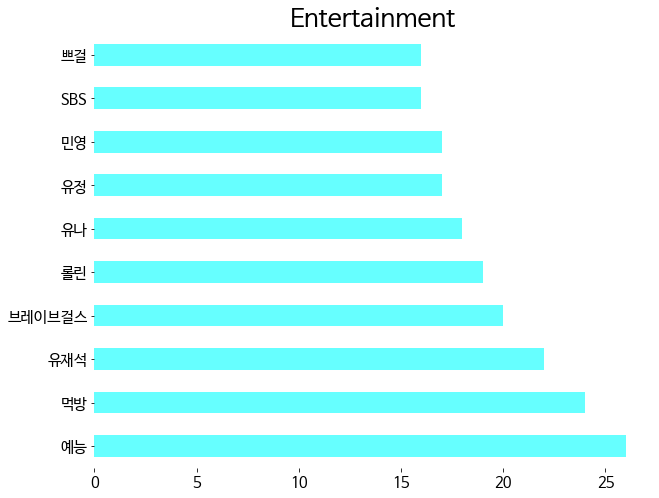

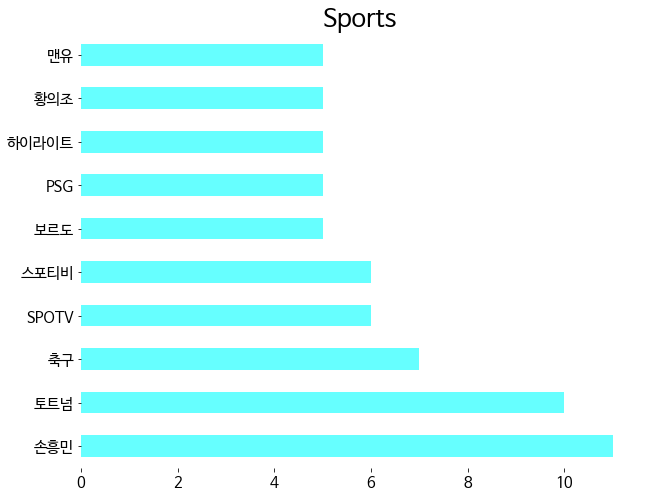

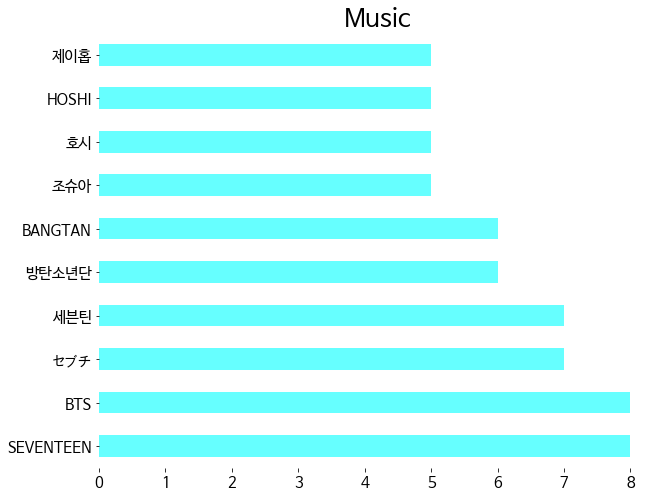

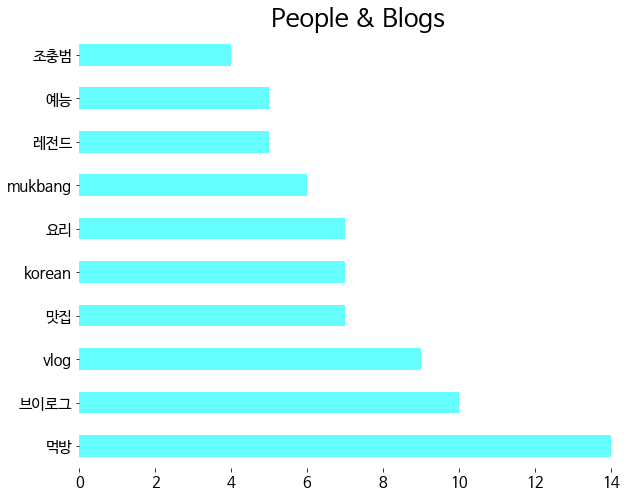

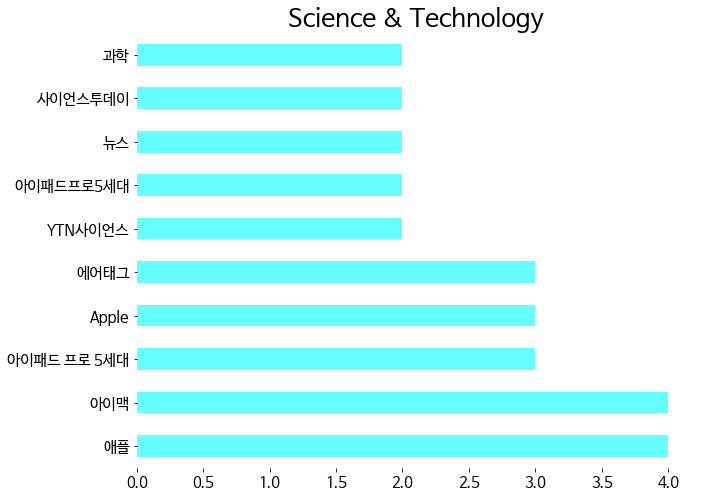

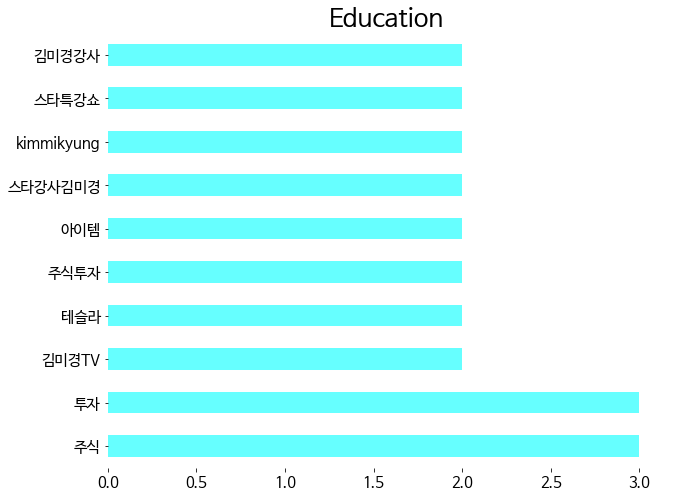

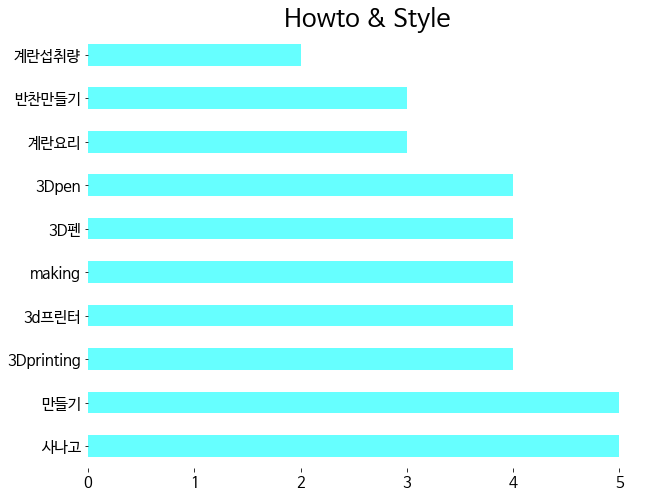

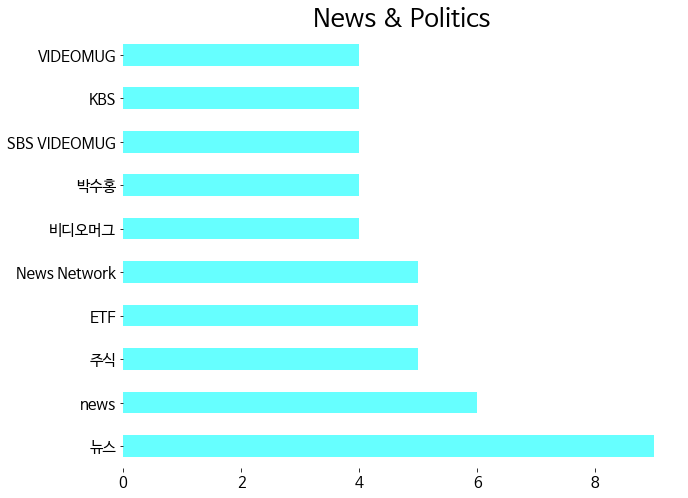

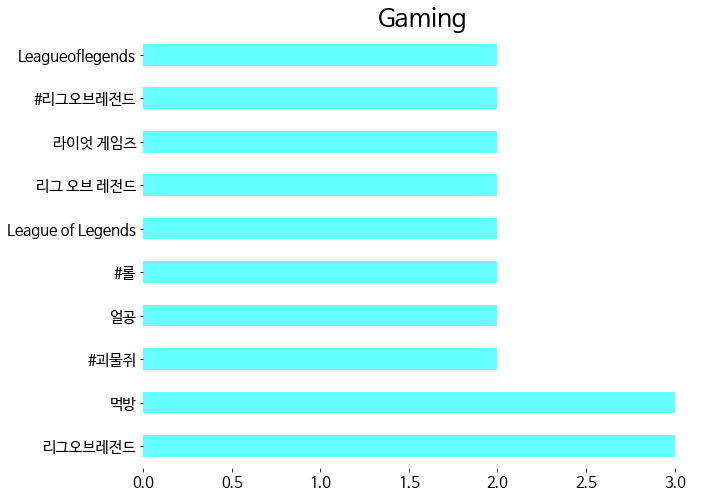

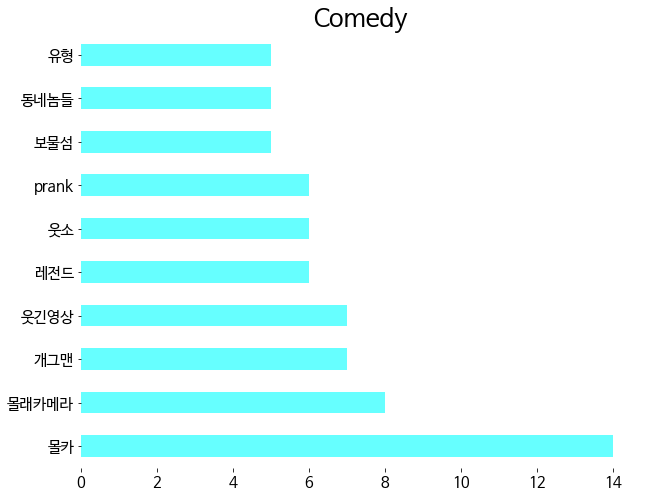

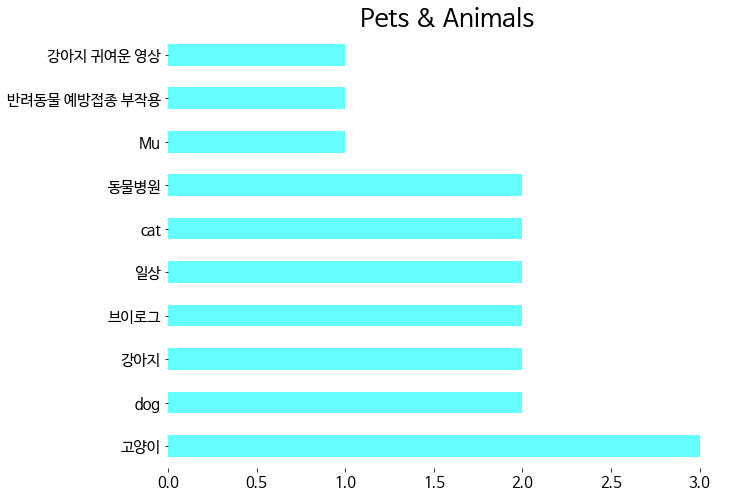

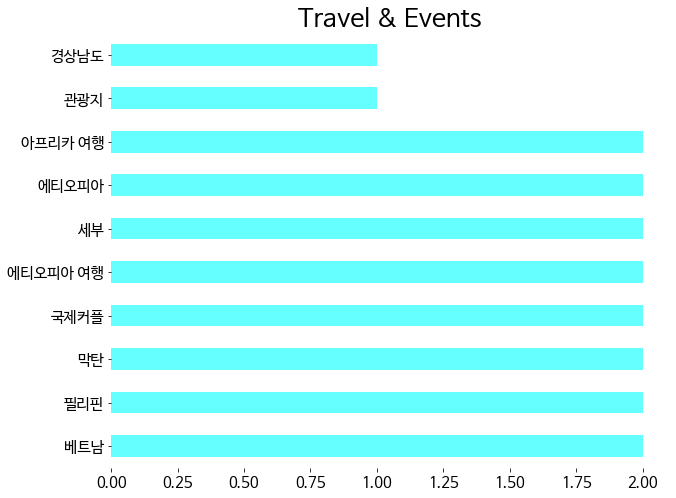

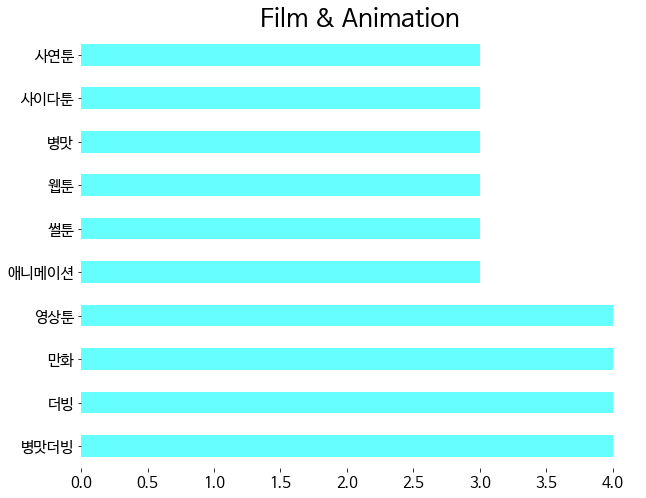

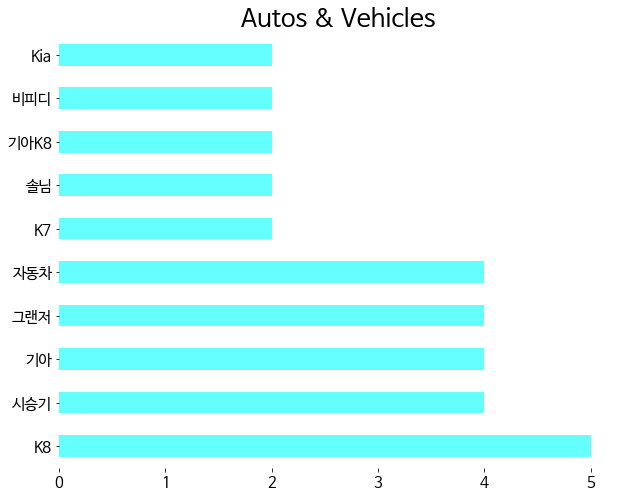

In [85]:
for i,j in zip(list_1, list_1_):
    tag_plot(data, i,j)

In [86]:
data = june
color='#404040'

In [87]:
Entertainment = data[data.category_name=='Entertainment']
Sports = data[data.category_name=='Sports']
Music = data[data.category_name=='Music']
People_Blogs = data[data.category_name=='People & Blogs']
Science_Technology = data[data.category_name=='Science & Technology']
Education = data[data.category_name=='Education']
Howto_Style = data[data.category_name=='Howto & Style']
News_Politics = data[data.category_name=='News & Politics']
Gaming = data[data.category_name=='Gaming']
Comedy = data[data.category_name=='Comedy']
Pets_Animals = data[data.category_name=='Pets & Animals']
Travel_Events = data[data.category_name=='Travel & Events']
Film_Animation = data[data.category_name=='Film & Animation']
Autos_Vehicles = data[data.category_name=='Autos & Vehicles']
Nonprofits_Activism = data[data.category_name=='Nonprofits & Activism']

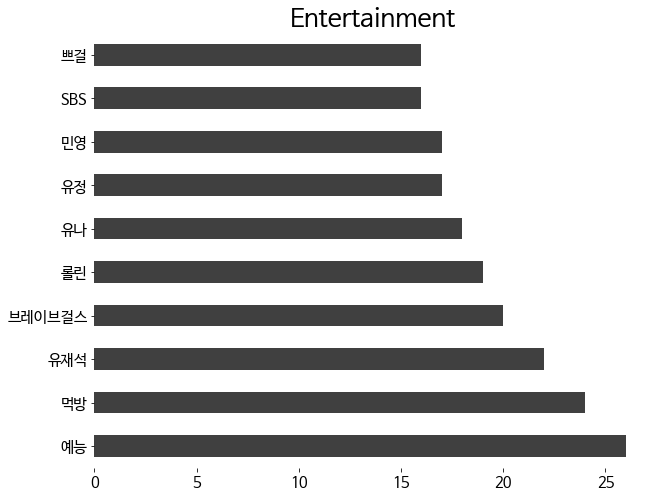

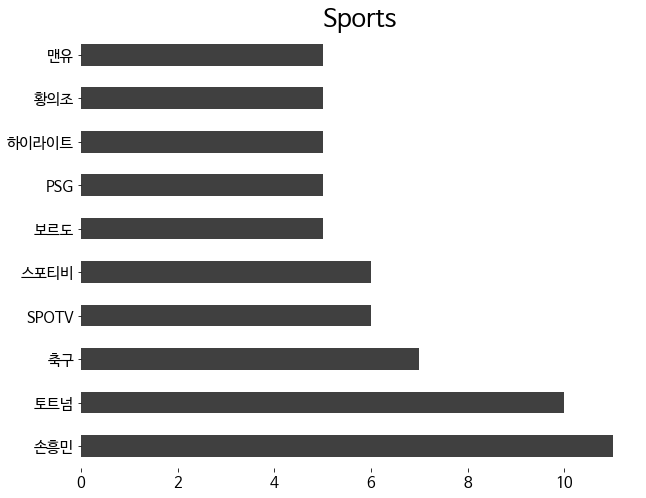

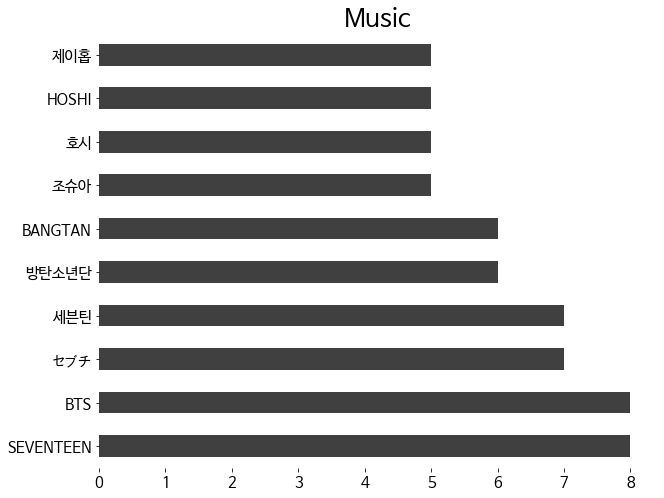

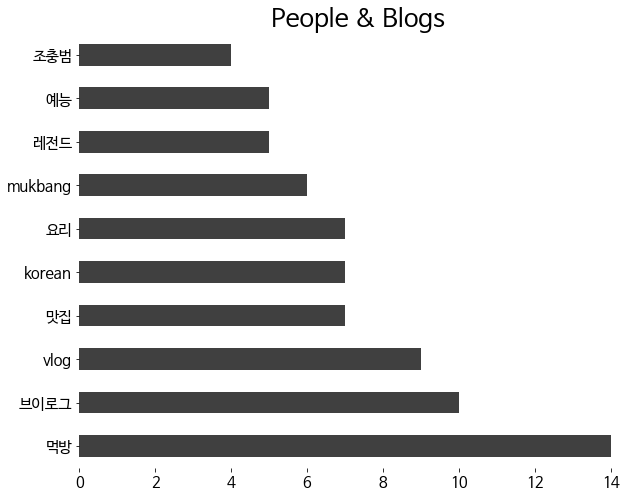

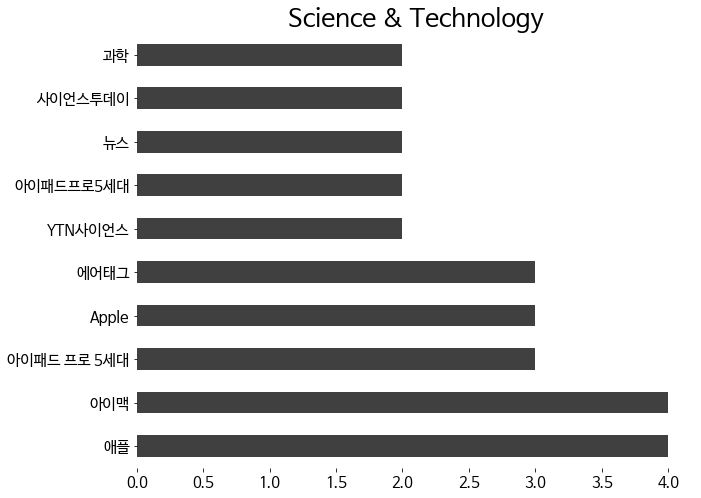

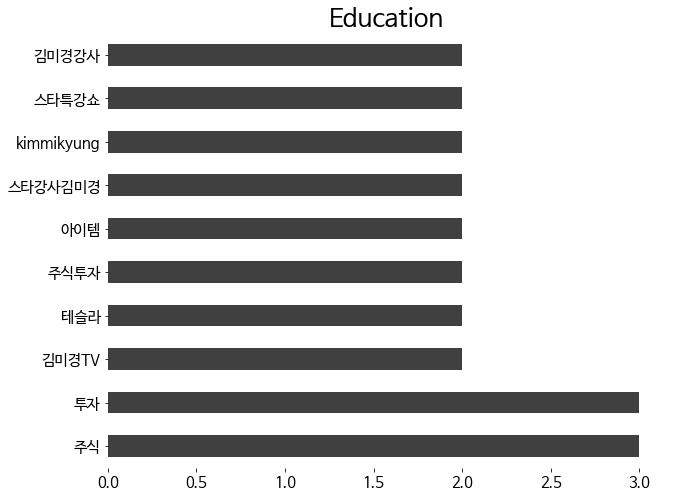

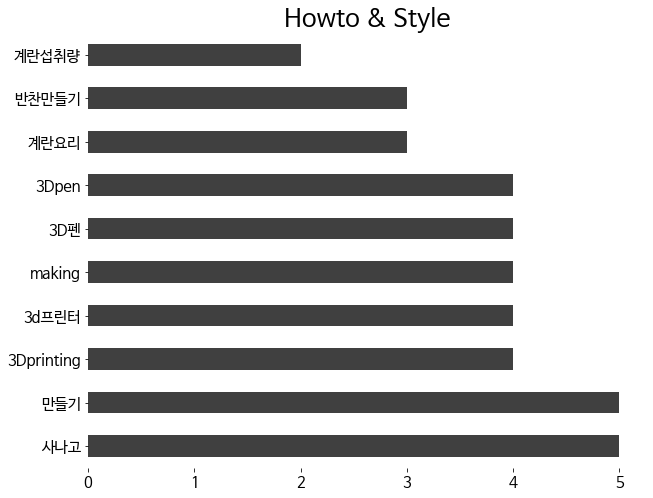

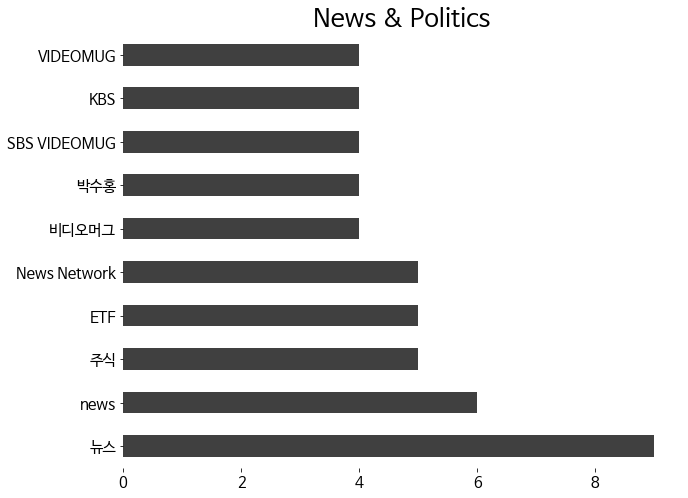

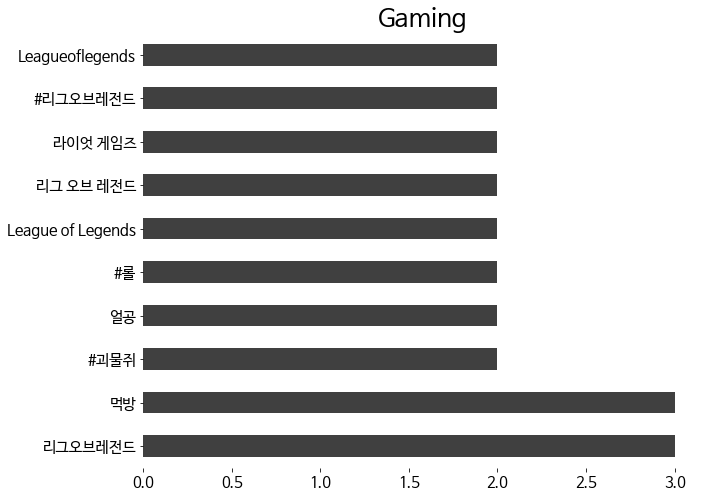

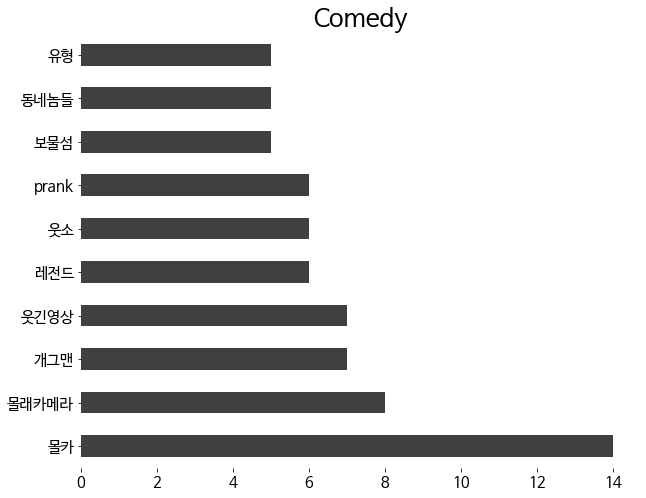

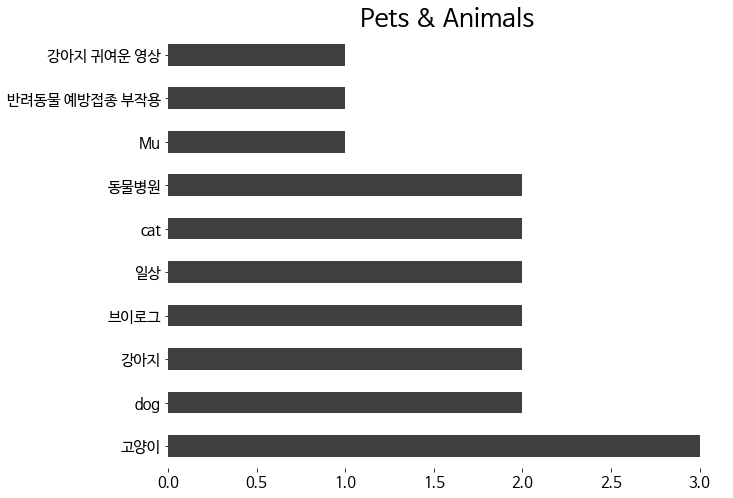

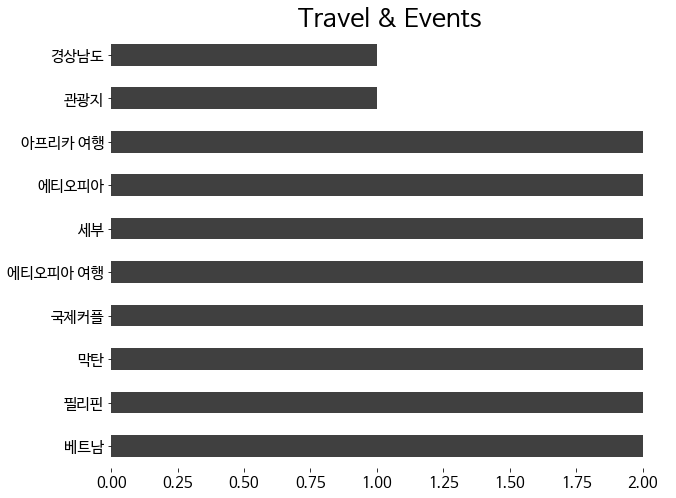

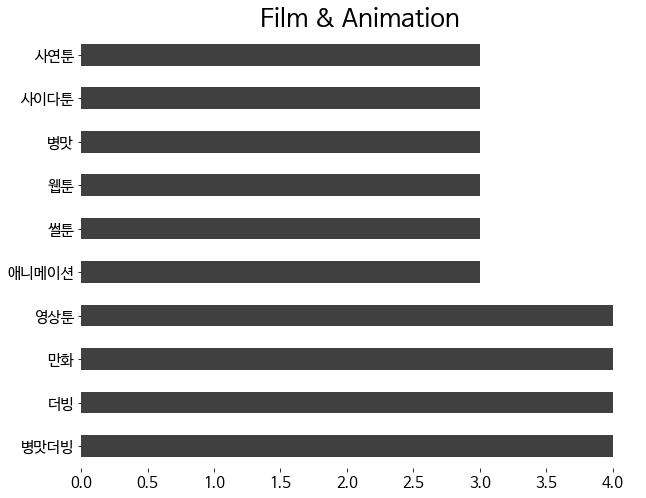

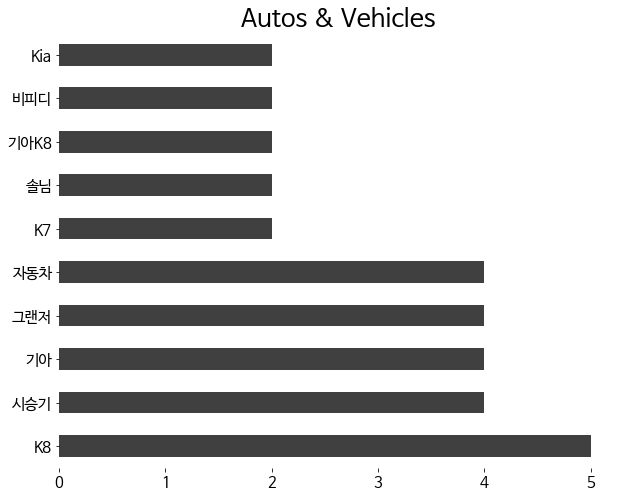

In [88]:
for i,j in zip(list_1, list_1_):
    tag_plot(data, i,j)

In [89]:
data = july
color='#FF9933'

In [90]:
Entertainment = data[data.category_name=='Entertainment']
Sports = data[data.category_name=='Sports']
Music = data[data.category_name=='Music']
People_Blogs = data[data.category_name=='People & Blogs']
Science_Technology = data[data.category_name=='Science & Technology']
Education = data[data.category_name=='Education']
Howto_Style = data[data.category_name=='Howto & Style']
News_Politics = data[data.category_name=='News & Politics']
Gaming = data[data.category_name=='Gaming']
Comedy = data[data.category_name=='Comedy']
Pets_Animals = data[data.category_name=='Pets & Animals']
Travel_Events = data[data.category_name=='Travel & Events']
Film_Animation = data[data.category_name=='Film & Animation']
Autos_Vehicles = data[data.category_name=='Autos & Vehicles']
Nonprofits_Activism = data[data.category_name=='Nonprofits & Activism']

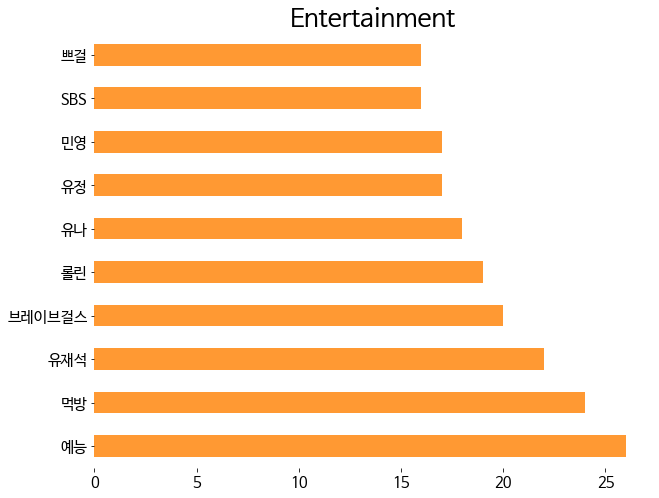

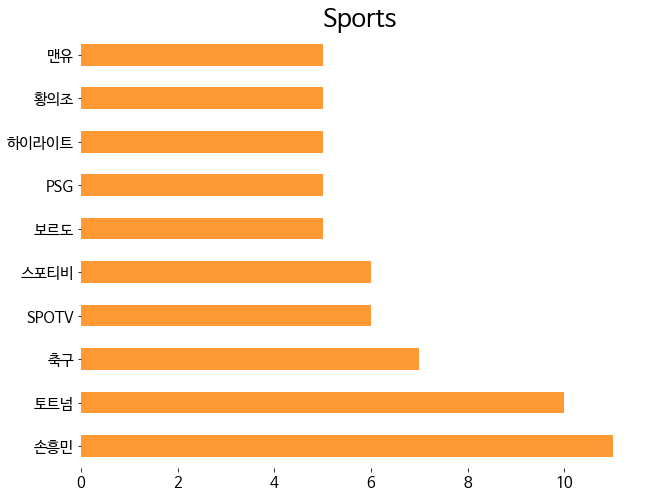

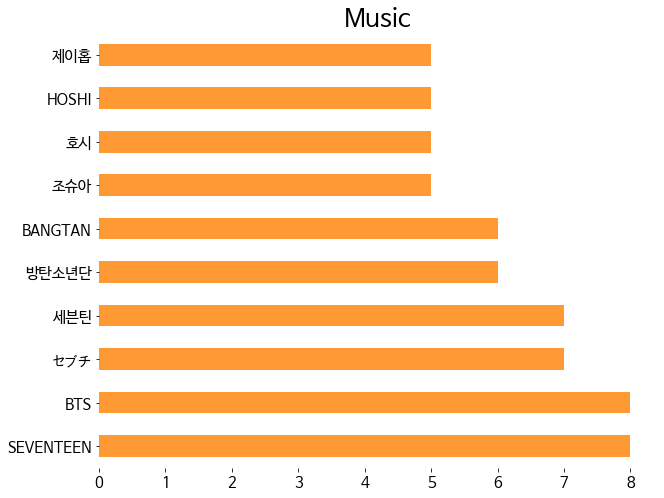

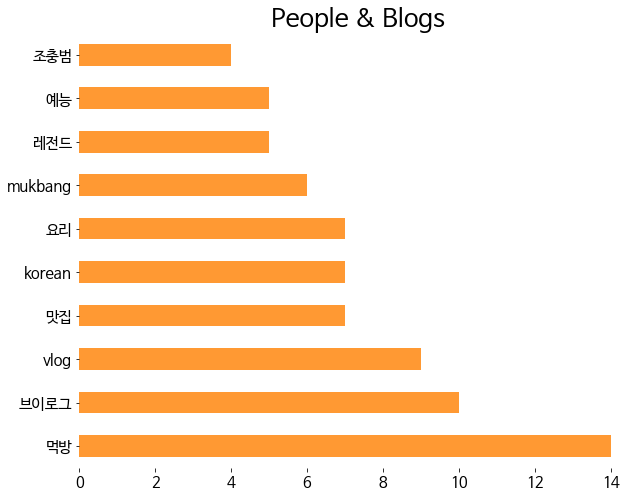

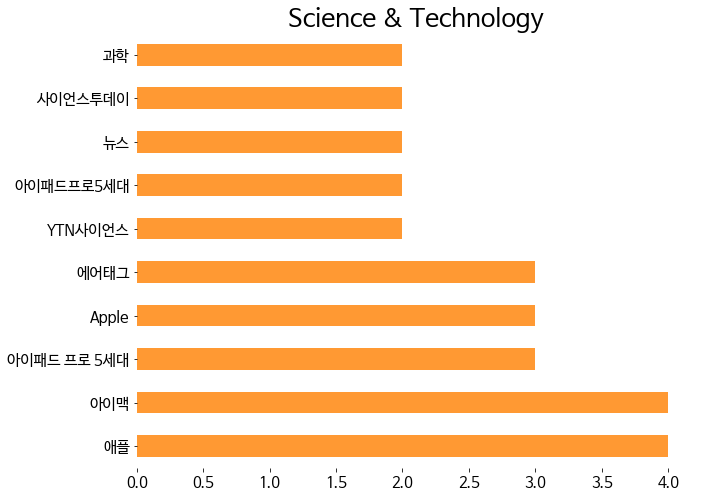

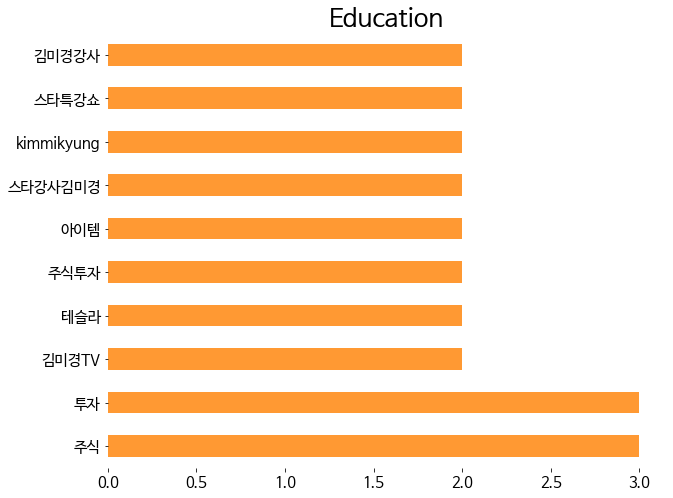

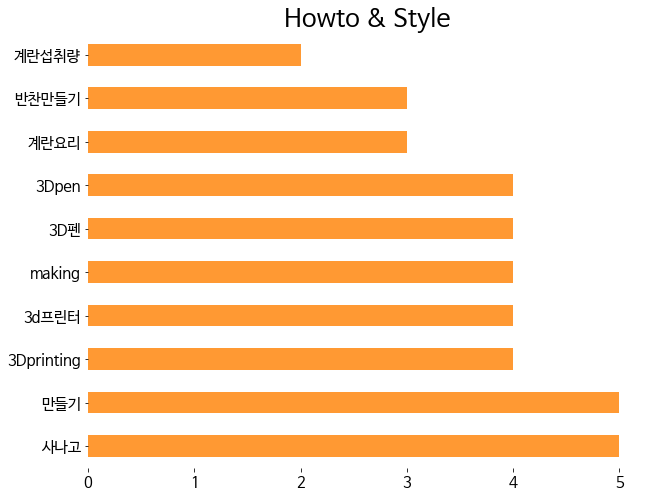

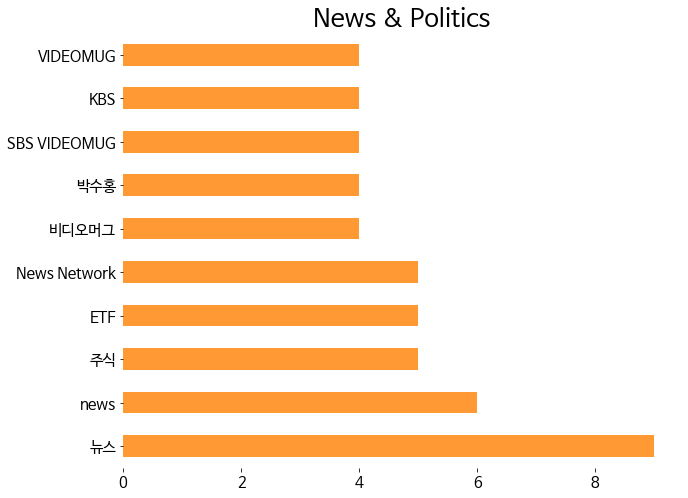

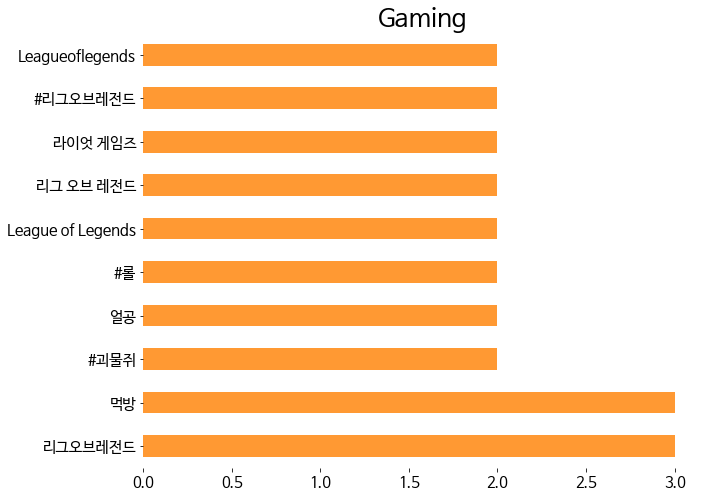

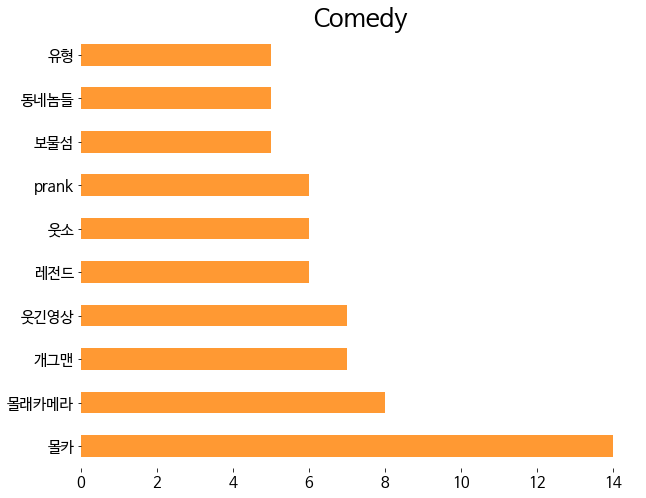

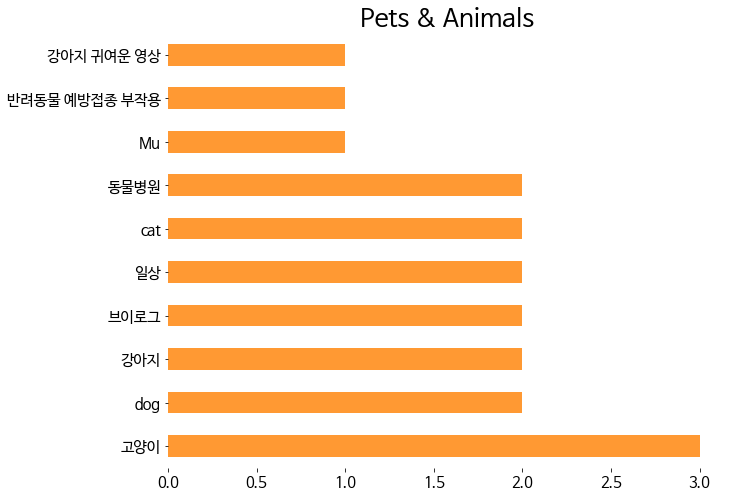

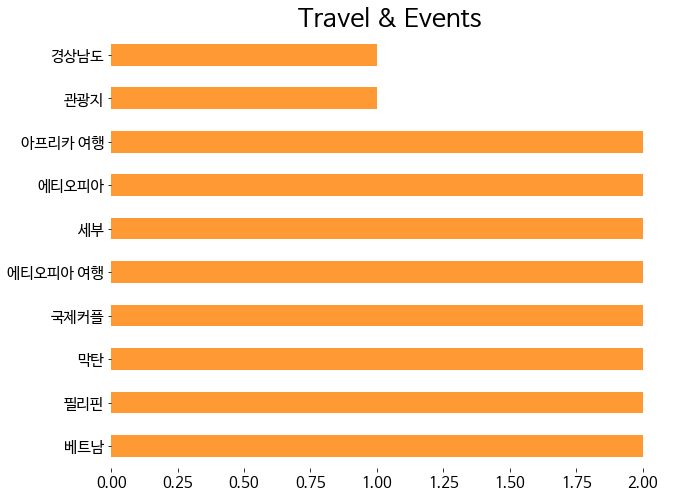

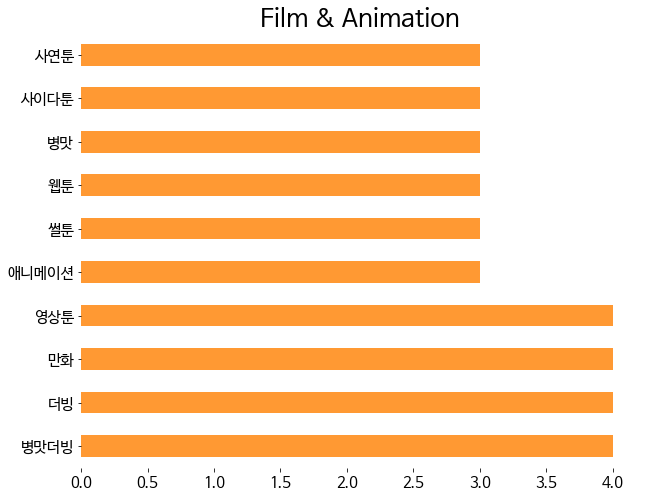

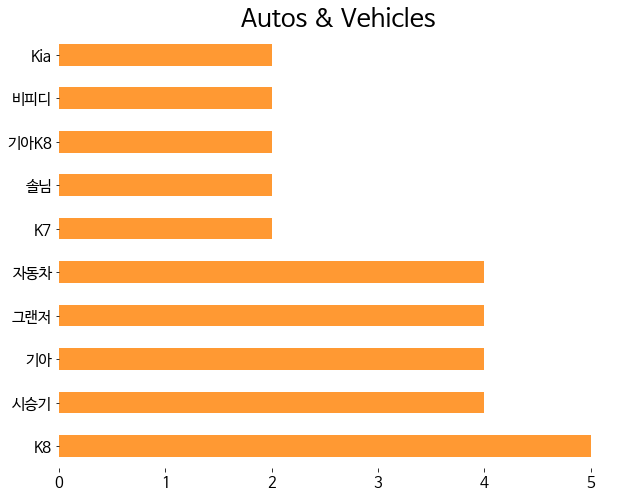

In [91]:
for i,j in zip(list_1, list_1_):
    tag_plot(data, i,j)

## 인기 동영상 기준

In [92]:
data = pd.read_csv('./pretest_data.csv')
data['until_trending'] = (data["on_trending_date"].astype('datetime64[ns]') - data["published_date"].astype('datetime64[ns]')).dt.days + 1
data['until_off_trending'] = (data["off_trending_date"].astype('datetime64[ns]') - data["on_trending_date"].astype('datetime64[ns]')).dt.days + 1

In [93]:
data['until_trending'].value_counts()

3    2237
4     202
2     153
5      41
6       7
7       4
Name: until_trending, dtype: int64

In [94]:
data['until_off_trending'].value_counts()

2    878
1    739
3    603
4    292
5    108
6     21
7      2
8      1
Name: until_off_trending, dtype: int64

### 조회 수

In [95]:
view_per_trending = data.on_views/data.until_trending
view_per_off_trending = (data.off_views-data.on_views)/data.until_off_trending

* 분포가 한 쪽으로 치우침

In [96]:
skew(view_per_trending), skew(view_per_off_trending)

(23.469905677944546, 18.482269464096237)

In [97]:
data['log_view'] = np.log1p(view_per_trending)+1
data['log_off_view'] = np.log1p(view_per_off_trending)+1

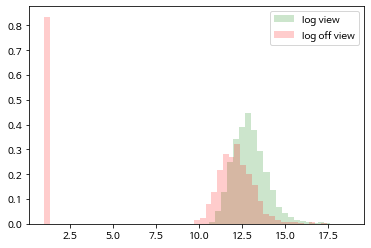

In [98]:
plt.hist(data.log_view, color = 'green', alpha = 0.2, bins = 50, label = 'log view', density = True)
plt.hist(data.log_off_view, color = 'red', alpha = 0.2, bins = 50, label = 'log off view', density = True)
plt.legend()
plt.show()

* 분포를 확인 후, 7.5 이상의 값만 비교

In [99]:
log_view = data.log_view[data.log_view>8.5]
log_off_view = data.log_off_view[data.log_off_view>8.5]

* 두 분포 사이에 평균의 차이가 관찰됨

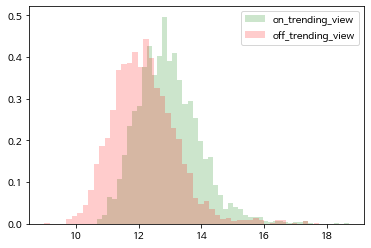

In [100]:
plt.hist(log_view, color = 'green', alpha = 0.2, bins = 50, label = 'on_trending_view', density = True)
plt.hist(log_off_view, color = 'red', alpha = 0.2, bins = 50, label = 'off_trending_view', density = True)
plt.legend()
plt.show()

### 댓글 수

In [101]:
comment_per_trending = data.on_comments/data.until_trending
comment_per_off_trending = (data.off_comments-data.on_comments)/data.until_off_trending

In [102]:
skew(comment_per_trending), skew(comment_per_off_trending)

(35.06221935381286, 30.02584904751669)

In [103]:
data['log_comment'] = np.log1p(comment_per_trending)+1
data['log_off_comment'] = np.log1p(comment_per_off_trending)+1

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


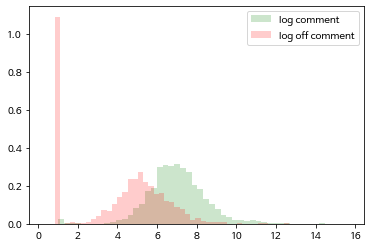

In [104]:
plt.hist(data.log_comment, color = 'green', alpha = 0.2, bins = 50, label = 'log comment', density = True)
plt.hist(data.log_off_comment, color = 'red', alpha = 0.2, bins = 50, label = 'log off comment', density = True)
plt.legend()
plt.show()

In [105]:
log_comment = data.log_comment[data.log_comment>2]
log_off_comment = data.log_off_comment[data.log_off_comment>2]

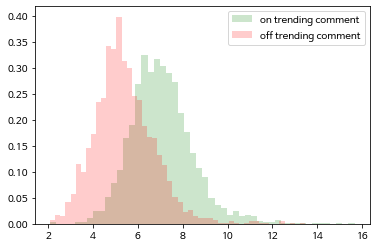

In [106]:
plt.hist(log_comment, color = 'green', alpha = 0.2, bins = 50, label = 'on trending comment', density = True)
plt.hist(log_off_comment, color = 'red', alpha = 0.2, bins = 50, label = 'off trending comment', density = True)
plt.legend()
plt.show()

### 좋아요 수

In [107]:
data.columns

Index(['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
       'tags', 'description', 'on_trending_date', 'off_trending_date',
       'on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos', 'until_trending',
       'until_off_trending', 'log_view', 'log_off_view', 'log_comment',
       'log_off_comment'],
      dtype='object')

In [108]:
likes_per_trending = data.on_likes/data.until_trending
likes_per_off_trending = (data.off_likes-data.on_likes)/data.until_off_trending

In [109]:
skew(likes_per_trending), skew(likes_per_off_trending)

(18.942258337363853, 22.733256400194673)

In [110]:
data['log_likes'] = np.log1p(likes_per_trending)+1
data['log_off_likes'] = np.log1p(likes_per_off_trending)+1

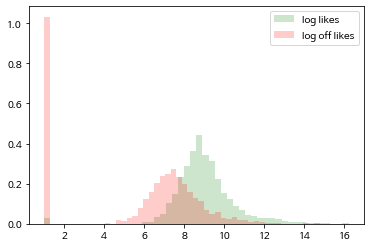

In [111]:
plt.hist(data.log_likes, color = 'green', alpha = 0.2, bins = 50, label = 'log likes', density = True)
plt.hist(data.log_off_likes, color = 'red', alpha = 0.2, bins = 50, label = 'log off likes', density = True)
plt.legend()
plt.show()

In [112]:
log_likes = data.log_likes[data.log_likes>3]
log_off_likes = data.log_off_likes[data.log_off_likes>3]

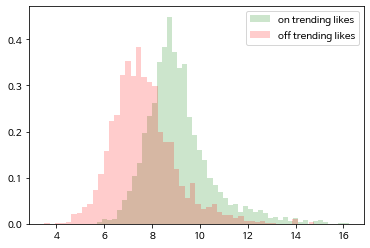

In [113]:
plt.hist(log_likes, color = 'green', alpha = 0.2, bins = 50, label = 'on trending likes', density = True)
plt.hist(log_off_likes, color = 'red', alpha = 0.2, bins = 50, label = 'off trending likes', density = True)
plt.legend()
plt.show()

### 싫어요 수

In [114]:
data.columns

Index(['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
       'tags', 'description', 'on_trending_date', 'off_trending_date',
       'on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos', 'until_trending',
       'until_off_trending', 'log_view', 'log_off_view', 'log_comment',
       'log_off_comment', 'log_likes', 'log_off_likes'],
      dtype='object')

In [115]:
dislikes_per_trending = data.on_dislikes/data.until_trending
dislikes_per_off_trending = (data.off_dislikes-data.on_dislikes)/data.until_off_trending

In [116]:
skew(dislikes_per_trending), skew(dislikes_per_off_trending)

(10.672319157174718, 17.9638221792167)

In [117]:
data['log_dislikes'] = np.log1p(dislikes_per_trending)+1
data['log_off_dislikes'] = np.log1p(dislikes_per_off_trending)+1

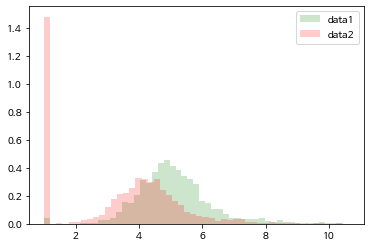

In [118]:
plt.hist(data.log_dislikes, color = 'green', alpha = 0.2, bins = 50, label = 'data1', density = True)
plt.hist(data.log_off_dislikes, color = 'red', alpha = 0.2, bins = 50, label = 'data2', density = True)
plt.legend()
plt.show()

In [119]:
log_dislikes = data.log_dislikes[data.log_dislikes>1.5]
log_off_dislikes = data.log_off_dislikes[data.log_off_dislikes>1.5]

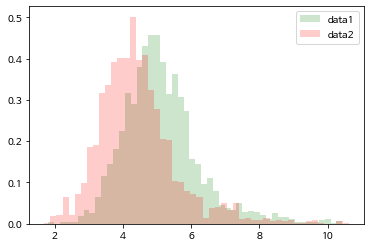

In [120]:
plt.hist(log_dislikes, color = 'green', alpha = 0.2, bins = 50, label = 'data1', density = True)
plt.hist(log_off_dislikes, color = 'red', alpha = 0.2, bins = 50, label = 'data2', density = True)
plt.legend()
plt.show()

### 지표 개발

In [121]:
data.columns

Index(['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
       'tags', 'description', 'on_trending_date', 'off_trending_date',
       'on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos', 'until_trending',
       'until_off_trending', 'log_view', 'log_off_view', 'log_comment',
       'log_off_comment', 'log_likes', 'log_off_likes', 'log_dislikes',
       'log_off_dislikes'],
      dtype='object')

In [122]:
data['new_index'] = np.log1p(data.log_view * data.log_comment * data.log_likes * data.log_dislikes)
data['new_off_index'] = np.log1p(data.log_off_view * data.log_off_comment * data.log_off_likes * data.log_off_dislikes)

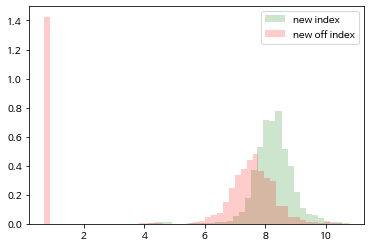

In [123]:
plt.hist(data.new_index, color = 'green', alpha = 0.2, bins = 50, label = 'new index', density = True)
plt.hist(data.new_off_index, color = 'red', alpha = 0.2, bins = 50, label = 'new off index', density = True)
plt.legend()
plt.show()

In [124]:
new_index = data.new_index[data.new_index>5]
new_off_index = data.new_off_index[data.new_off_index>5]

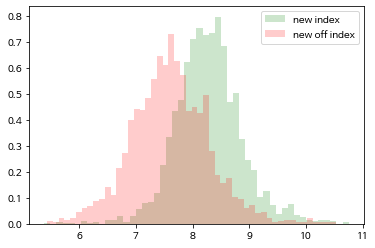

In [125]:
plt.hist(new_index, color = 'green', alpha = 0.2, bins = 50, label = 'new index', density = True)
plt.hist(new_off_index, color = 'red', alpha = 0.2, bins = 50, label = 'new off index', density = True)
plt.legend()
plt.show()

## 상관관계 분석

In [126]:
data.columns

Index(['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
       'tags', 'description', 'on_trending_date', 'off_trending_date',
       'on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos', 'until_trending',
       'until_off_trending', 'log_view', 'log_off_view', 'log_comment',
       'log_off_comment', 'log_likes', 'log_off_likes', 'log_dislikes',
       'log_off_dislikes', 'new_index', 'new_off_index'],
      dtype='object')

In [127]:
heatmap_data = data[['on_views', 'off_views', 'on_likes', 'off_likes', 'on_comments', 'off_comments', 'new_index', 'new_off_index']]

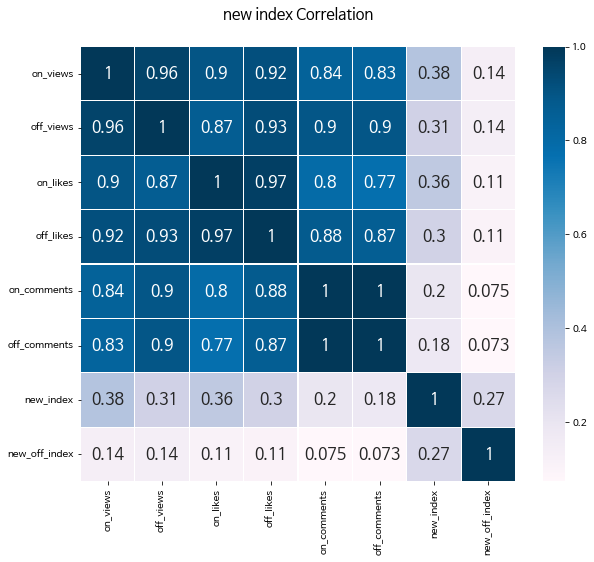

In [128]:
colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("new index Correlation", y = 1.05, size = 15) 
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

